# Cod Licență 24h survival prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
import sklearn as sklearn
import random as random
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneOut
%matplotlib notebook
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score
from IPython.display import clear_output
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from tensorflow import feature_column

In [2]:
import os
import tensorflow as tf

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


In [3]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Data explore & pre-processing

In [5]:
data_dictionary = pd.read_csv('WiDS_Datathon_2020_Dictionary.csv') #data is presumed to be in the same folder. 
data_dictionary.info()
data_dictionary.head(188)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         188 non-null    object
 1   Variable Name    188 non-null    object
 2   Unit of Measure  188 non-null    object
 3   Data Type        188 non-null    object
 4   Description      187 non-null    object
 5   Example          188 non-null    object
dtypes: object(6)
memory usage: 8.9+ KB


Category                  Variable Name  \
0                   identifier                   encounter_id   
1                   identifier                    hospital_id   
2                   identifier                     patient_id   
3                  demographic                 hospital_death   
4                  demographic                            age   
5                  demographic                            bmi   
6                  demographic               elective_surgery   
7                  demographic                      ethnicity   
8                  demographic                         gender   
9                  demographic                         height   
10                 demographic          hospital_admit_source   
11                 demographic               icu_admit_source   
12                 demographic                 icu_admit_type   
13                 demographic                         icu_id   
14                 demographic                  icu_stay_type   
15                 demographic                       icu_type   
16                 demographic               pre_icu_los_days   
17                 demographic             readmission_status   
18                 demographic                         weight   
19            APACHE covariate                 albumin_apache   
20            APACHE covariate             apache_2_diagnosis   
21            APACHE covariate            apache_3j_diagnosis   
22            APACHE covariate          apache_post_operative   
23            APACHE covariate                     arf_apache   
24            APACHE covariate               bilirubin_apache   
25            APACHE covariate                     bun_apache   
26            APACHE covariate              creatinine_apache   
27            APACHE covariate                    fio2_apache   
28            APACHE covariate                gcs_eyes_apache   
29            APACHE covariate               gcs_motor_apache   
30            APACHE covariate              gcs_unable_apache   
31            APACHE covariate              gcs_verbal_apache   
32            APACHE covariate                 glucose_apache   
33            APACHE covariate              heart_rate_apache   
34            APACHE covariate              hematocrit_apache   
35            APACHE covariate               intubated_apache   
36            APACHE covariate                     map_apache   
37            APACHE covariate                   paco2_apache   
38            APACHE covariate            paco2_for_ph_apache   
39            APACHE covariate                    pao2_apache   
40            APACHE covariate                      ph_apache   
41            APACHE covariate                resprate_apache   
42            APACHE covariate                  sodium_apache   
43            APACHE covariate                    temp_apache   
44            APACHE covariate             urineoutput_apache   
45            APACHE covariate              ventilated_apache   
46            APACHE covariate                     wbc_apache   
47                      vitals         d1_diasbp_invasive_max   
48                      vitals         d1_diasbp_invasive_min   
49                      vitals                  d1_diasbp_max   
50                      vitals                  d1_diasbp_min   
51                      vitals      d1_diasbp_noninvasive_max   
52                      vitals      d1_diasbp_noninvasive_min   
53                      vitals               d1_heartrate_max   
54                      vitals               d1_heartrate_min   
55                      vitals            d1_mbp_invasive_max   
56                      vitals            d1_mbp_invasive_min   
57                      vitals                     d1_mbp_max   
58                      vitals                     d1_mbp_min   
59                      vitals         d1_mbp_noninvasive_max   
60                      vitals         d1_mbp_noninvasive

In [6]:
data_train = pd.read_csv('training_v2.csv') 
data_train.head()

encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity gender  height hospital_admit_source  \
0                 0  Caucasian      M   180.3                 Floor   
1                 0  Caucasian      F   160.0                 Floor   
2                 0  Caucasian      F   172.7  Emergency Department   
3                 1  Caucasian      F   165.1        Operating Room   
4                 0  Caucasian      M   188.0                   NaN   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0                      Floor      92         admit         CTICU   
1                      Floor      90         admit  Med-Surg ICU   
2       Accident & Emergency      93         admit  Med-Surg ICU   
3  Operating Room / Recovery      92         admit         CTICU   
4       Accident & Emergency      91         admit  Med-Surg ICU   

   pre_icu_los_days  readmission_status  weight  albumin_apache  \
0          0.541667                   0    73.9             2.3   
1          0.927778                   0    70.2             NaN   
2          0.000694                   0    95.3             NaN   
3          0.000694                   0    61.7             NaN   
4          0.073611                   0     NaN             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                      0         0.0   
1               108.0               203.01                      0         0.0   
2               122.0               703.03                      0         0.0   
3               203.0              1206.03                      1         0.0   
4               119.0               601.01                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0               0.4        31.0               2.51          NaN   
1               NaN         9.0               0.56          1.0   
2               NaN         NaN                NaN          NaN   
3               NaN         NaN                NaN          0.6   
4               NaN         NaN                NaN          NaN   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0               27.4               0.0   
1           145.0              120.0               36.9               0.0   
2             NaN              102.0                NaN               0.0   
3           185.0              114.0               25.9               1.0   
4             NaN               60.0                NaN               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0           NaN                  NaN          NaN        NaN   
1        46.0          37.0                 37.0         51.0       7.45   
2        68.0           NaN                  NaN          NaN        NaN   
3        60.0          30.0                 30.0        142.0       7.39   
4       103.0           NaN                  NaN          NaN        NaN   

   resprate_apache  sodium_apache  temp_apache

In [7]:
data_dictionary["Category"].value_counts()

labs                         60
vitals                       52
APACHE covariate             28
demographic                  16
labs blood gas               16
APACHE comorbidity            8
identifier                    3
APACHE prediction             2
APACHE grouping               2
GOSSIS example prediction     1
Name: Category, dtype: int64

In [8]:
columns_labs_new=data_dictionary[data_dictionary['Category']=="labs"]
print(columns_labs_new)

    Category      Variable Name Unit of Measure Data Type  \
99      labs     d1_albumin_max            None   numeric   
100     labs     d1_albumin_min             g/L   numeric   
101     labs   d1_bilirubin_max      micromol/L   numeric   
102     labs   d1_bilirubin_min      micromol/L   numeric   
103     labs         d1_bun_max          mmol/L   numeric   
104     labs         d1_bun_min          mmol/L   numeric   
105     labs     d1_calcium_max          mmol/L   numeric   
106     labs     d1_calcium_min          mmol/L   numeric   
107     labs  d1_creatinine_max      micromol/L   numeric   
108     labs  d1_creatinine_min      micromol/L   numeric   
109     labs     d1_glucose_max          mmol/L   numeric   
110     labs     d1_glucose_min          mmol/L   numeric   
111     labs        d1_hco3_max          mmol/L   numeric   
112     labs        d1_hco3_min            None   numeric   
113     labs  d1_hemaglobin_max            g/dL   numeric   
114     labs  d1_hemaglo

In [9]:
data_test = pd.read_csv('unlabeled.csv') 
data_test.head()

encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0             2      127112            7             NaN  56.0  21.102439   
1             5      130737          178             NaN   NaN  19.500595   
2             7      101458           86             NaN  66.0  32.518596   
3             8       48067          163             NaN  64.0  20.798520   
4            10       25865           59             NaN  56.0        NaN   

   elective_surgery         ethnicity gender  height hospital_admit_source  \
0                 0         Caucasian      M   180.3  Emergency Department   
1                 1         Caucasian      F   145.0        Operating Room   
2                 1  African American      M   170.2        Operating Room   
3                 0         Caucasian      M   182.8        Operating Room   
4                 0         Caucasian      M     NaN  Emergency Department   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0       Accident & Emergency    1105         admit     Neuro ICU   
1  Operating Room / Recovery    1043         admit  Med-Surg ICU   
2  Operating Room / Recovery    1035         admit     CCU-CTICU   
3  Operating Room / Recovery    1078         admit  Med-Surg ICU   
4       Accident & Emergency    1012         admit     Neuro ICU   

   pre_icu_los_days  readmission_status  weight  albumin_apache  \
0          0.104167                   0    68.6             3.7   
1          0.230556                   0    41.0             NaN   
2          0.140972                   0    94.2             NaN   
3          0.002083                   0    69.5             1.9   
4          0.004861                   0    66.4             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               301.0               405.01                      0         0.0   
1               217.0              1502.02                      1         0.0   
2               302.0              1208.06                      1         0.0   
3               303.0               211.03                      0         0.0   
4               217.0              1501.01                      1         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0               NaN        19.0               0.67          NaN   
1               NaN         NaN                NaN          NaN   
2               NaN        22.0               1.84          NaN   
3               0.8        24.0               0.75          0.7   
4               NaN        11.0               0.52          NaN   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              2.0               5.0                0.0                1.0   
1              4.0               6.0                0.0                4.0   
2              2.0               5.0                0.0                1.0   
3              4.0               6.0                0.0                1.0   
4              1.0               4.0                0.0                1.0   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           276.0              105.0               42.0               0.0   
1             NaN               60.0                NaN               0.0   
2            81.0              124.0               39.2               0.0   
3           122.0              111.0               32.0               1.0   
4           192.0               94.0               32.8               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        57.0           NaN                  NaN          NaN        NaN   
1        53.0           NaN                  NaN          NaN        NaN   
2       115.0           NaN                  NaN          NaN        NaN   
3        48.0          36.0                 36.0        142.0       7.35   
4        41.0           NaN                  NaN         

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [11]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39308 entries, 0 to 39307
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(171), int64(7), object(8)
memory usage: 55.8+ MB


In [12]:
data_train.shape

(91713, 186)

In [13]:
data_test.shape

(39308, 186)

In [14]:

undf=data_train.isnull().sum()
print("\n\n", '\033[1m'+ 'Look for undefined:' + '\033[0m',"\n",undf.sort_values())




 Look for undefined: 
 encounter_id                         0
pre_icu_los_days                     0
icu_type                             0
icu_stay_type                        0
icu_id                               0
readmission_status                   0
apache_post_operative                0
hospital_death                       0
hospital_id                          0
patient_id                           0
elective_surgery                     0
gender                              25
icu_admit_source                   112
d1_heartrate_min                   145
d1_heartrate_max                   145
d1_sysbp_max                       159
d1_sysbp_min                       159
d1_diasbp_max                      165
d1_diasbp_min                      165
d1_mbp_max                         220
d1_mbp_min                         220
d1_spo2_max                        333
d1_spo2_min                        333
d1_resprate_max                    385
d1_resprate_min                    385


We have a lot of undefined values so we need to do some pre-processing and see which attributes are more detrimental for the final result; Drop the ones with a lot of undefined; For the ones with few undefined, drop the subjects.

In [15]:
print("Number of unique genders: ",data_train['gender'].nunique())

Number of unique genders:  2


In [16]:
print("Number of unique ICU results: ",data_train['hospital_death'].nunique())

Number of unique ICU results:  2


In [17]:
print("Number of unique categoies post surgery: ",data_train['elective_surgery'].nunique())

Number of unique categoies post surgery:  2


In [18]:
data_train.describe()

encounter_id     patient_id   hospital_id  hospital_death  \
count   91713.000000   91713.000000  91713.000000    91713.000000   
mean    65606.079280   65537.131464    105.669262        0.086302   
std     37795.088538   37811.252183     62.854406        0.280811   
min         1.000000       1.000000      2.000000        0.000000   
25%     32852.000000   32830.000000     47.000000        0.000000   
50%     65665.000000   65413.000000    109.000000        0.000000   
75%     98342.000000   98298.000000    161.000000        0.000000   
max    131051.000000  131051.000000    204.000000        1.000000   

                age           bmi  elective_surgery        height  \
count  87485.000000  88284.000000      91713.000000  90379.000000   
mean      62.309516     29.185818          0.183736    169.641588   
std       16.775119      8.275142          0.387271     10.795378   
min       16.000000     14.844926          0.000000    137.200000   
25%       52.000000     23.641975          0.000000    162.500000   
50%       65.000000     27.654655          0.000000    170.100000   
75%       75.000000     32.930206          0.000000    177.800000   
max       89.000000     67.814990          1.000000    195.590000   

             icu_id  pre_icu_los_days  readmission_status        weight  \
count  91713.000000      91713.000000             91713.0  88993.000000   
mean     508.357692          0.835766                 0.0     84.028340   
std      228.989661          2.487756                 0.0     25.011497   
min       82.000000        -24.947222                 0.0     38.600000   
25%      369.000000          0.035417                 0.0     66.800000   
50%      504.000000          0.138889                 0.0     80.300000   
75%      679.000000          0.409028                 0.0     97.100000   
max      927.000000        159.090972                 0.0    186.000000   

       albumin_apache  apache_2_diagnosis  apache_3j_diagnosis  \
count    37334.000000        90051.000000         90612.000000   
mean         2.902968          185.401739           558.216377   
std          0.681863           86.050882           463.266985   
min          1.200000          101.000000             0.010000   
25%          2.400000          113.000000           203.010000   
50%          2.900000          122.000000           409.020000   
75%          3.400000          301.000000           703.030000   
max          4.600000          308.000000          2201.050000   

       apache_post_operative    arf_apache  bilirubin_apache   bun_apache  \
count           91713.000000  90998.000000      33579.000000  72451.00000   
mean                0.201106      0.027979          1.147721     25.82533   
std                 0.400829      0.164912          2.165538     20.67298   
min                 0.000000      0.000000          0.100000      4.00000   
25%                 0.000000      0.000000          0.400000     13.00000   
50%                 0.000000      0.000000          0.600000     19.00000   
75%                 0.000000      0.000000          1.100000     32.00000   
max                 1.000000      1.000000         51.000000    127.00000   

       creatinine_apache   fio2_apache  gcs_eyes_apache  gcs_motor_apache  \
count       72860.000000  20845.000000     89812.000000      89812.000000   
mean            1.480014      0.595751         3.465049          5.471195   
std             1.525787      0.263238         0.951715          1.288376   
min             0.300000      0.210000         1.000000          1.000000   
25%             0.720000      0.400000         3.000000          6.000000   
50%             0.980000      0.500000         4.000000          6.000000   
75%             1.530000      0.850000         4.000000          6.000000   
max            11.180000      1.000000         4.000000          6.000000   

       gcs_unable_apache  gcs_verbal_apache  glucose_apache  \
count       90676.000000       89812.00000

In [19]:
data_train.corr().style.background_gradient(cmap='coolwarm')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [20]:
data_train_clean=data_train.drop("readmission_status", axis='columns') #all of them are nan values so we drop

<IPython.core.display.Javascript object>


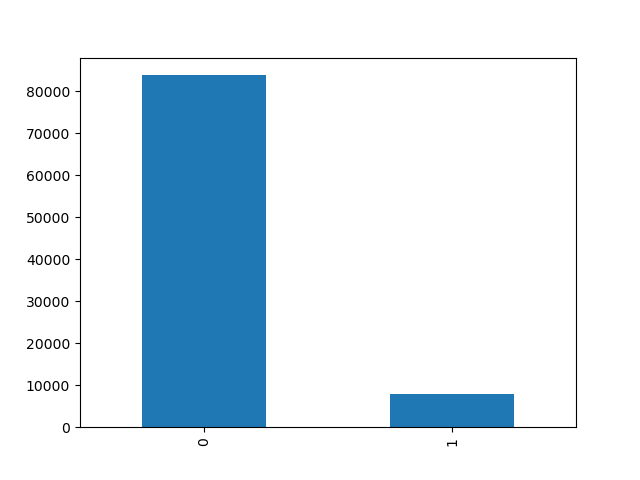

In [21]:
plt.figure()
data_train['hospital_death'].value_counts().plot(kind='bar')
plt.show()

<IPython.core.display.Javascript object>


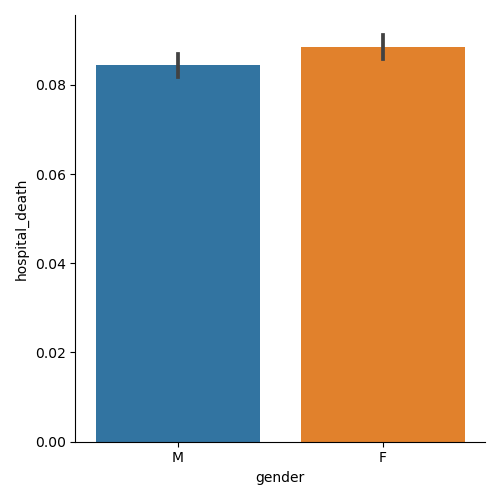

In [22]:
sb.catplot(x="gender",y="hospital_death",kind="bar",data=data_train)
plt.show()
#I use seaborn catplot function because I can make multiple types of plots with only one function, by changing the "kind" param

In [23]:
data_train_clean=data_train_clean.drop("gender", axis='columns') #there is no real difference between male and female
#death correlation so it doesn't influence =» we drop

In [24]:
data_train_clean.head() #check that it worked

encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity  height hospital_admit_source  \
0                 0  Caucasian   180.3                 Floor   
1                 0  Caucasian   160.0                 Floor   
2                 0  Caucasian   172.7  Emergency Department   
3                 1  Caucasian   165.1        Operating Room   
4                 0  Caucasian   188.0                   NaN   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0                      Floor      92         admit         CTICU   
1                      Floor      90         admit  Med-Surg ICU   
2       Accident & Emergency      93         admit  Med-Surg ICU   
3  Operating Room / Recovery      92         admit         CTICU   
4       Accident & Emergency      91         admit  Med-Surg ICU   

   pre_icu_los_days  weight  albumin_apache  apache_2_diagnosis  \
0          0.541667    73.9             2.3               113.0   
1          0.927778    70.2             NaN               108.0   
2          0.000694    95.3             NaN               122.0   
3          0.000694    61.7             NaN               203.0   
4          0.073611     NaN             NaN               119.0   

   apache_3j_diagnosis  apache_post_operative  arf_apache  bilirubin_apache  \
0               502.01                      0         0.0               0.4   
1               203.01                      0         0.0               NaN   
2               703.03                      0         0.0               NaN   
3              1206.03                      1         0.0               NaN   
4               601.01                      0         0.0               NaN   

   bun_apache  creatinine_apache  fio2_apache  gcs_eyes_apache  \
0        31.0               2.51          NaN              3.0   
1         9.0               0.56          1.0              1.0   
2         NaN                NaN          NaN              3.0   
3         NaN                NaN          0.6              4.0   
4         NaN                NaN          NaN              NaN   

   gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  glucose_apache  \
0               6.0                0.0                4.0           168.0   
1               3.0                0.0                1.0           145.0   
2               6.0                0.0                5.0             NaN   
3               6.0                0.0                5.0           185.0   
4               NaN                NaN                NaN             NaN   

   heart_rate_apache  hematocrit_apache  intubated_apache  map_apache  \
0              118.0               27.4               0.0        40.0   
1              120.0               36.9               0.0        46.0   
2              102.0                NaN               0.0        68.0   
3              114.0               25.9               1.0        60.0   
4               60.0                NaN               0.0       103.0   

   paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  resprate_apache  \
0           NaN                  NaN          NaN        NaN             36.0   
1          37.0                 37.0         51.0       7.45             33.0   
2           NaN                  NaN          NaN        NaN             37.0   
3          30.0                 30.0        142.0       7.39              4.0   
4           NaN                  NaN          NaN        NaN             16.0   

   sodium_apache  temp_apache  urineoutput_apache  ventilated_apache  \
0          134.0         39.3     

<IPython.core.display.Javascript object>


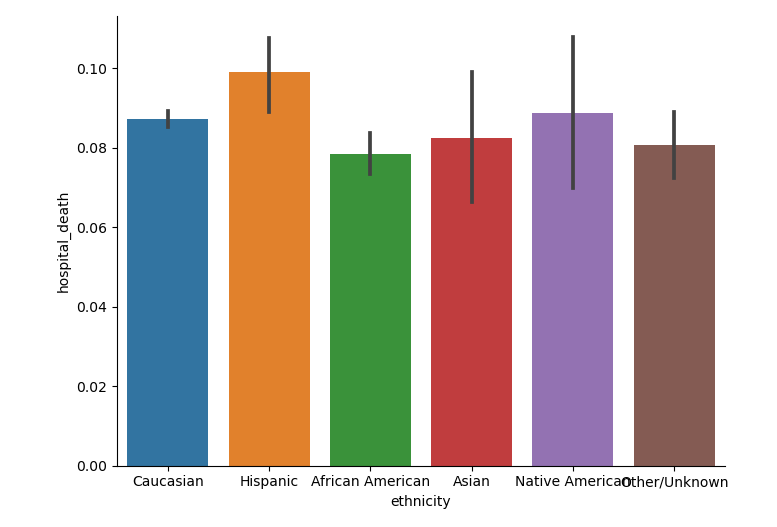

In [25]:
sb.catplot(x="ethnicity",y="hospital_death",kind="bar",data=data_train)
plt.show()

In [26]:
data_train_clean=data_train_clean.drop("ethnicity", axis='columns')#there is no real difference between ethnicities
#death correlation so it doesn't influence =» we drop

In [27]:
data_train['hospital_id'].count()
print("Number of unique hospitals: ",data_train['hospital_id'].nunique())

Number of unique hospitals:  147


<IPython.core.display.Javascript object>


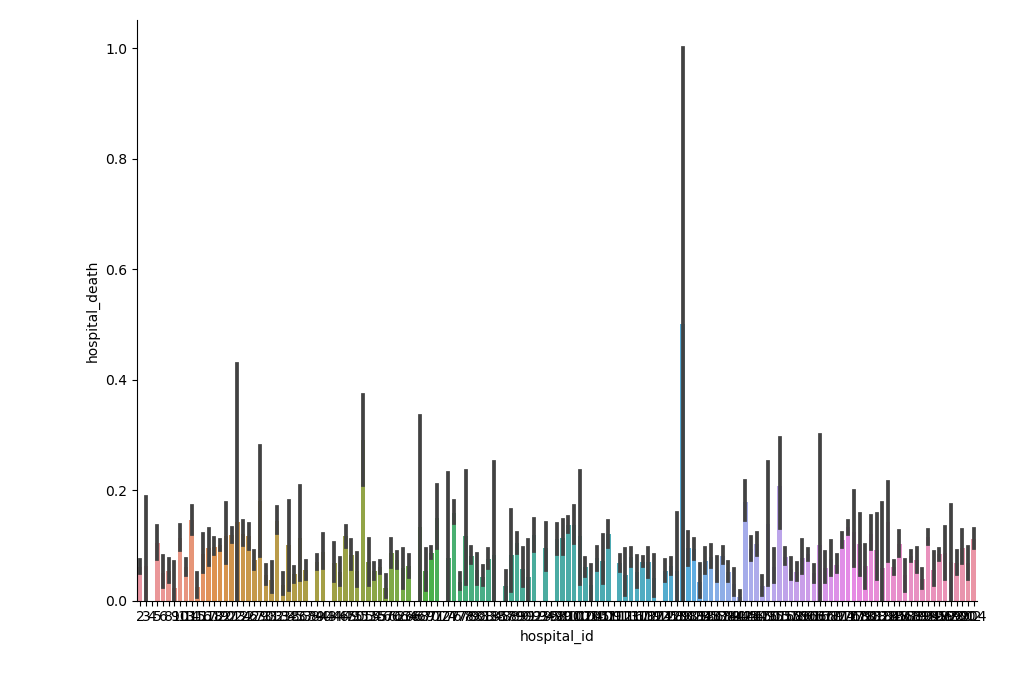

In [28]:

sb.catplot(x="hospital_id",y="hospital_death",kind="bar",data=data_train)
plt.show() #a lot of difference =» we keep
#also, all new checked values are the same in clean and data_train, so we check in data_train and modify in clean

In [29]:
print("Number of unique patients: ",data_train['patient_id'].nunique()) #unique values, no info about group

Number of unique patients:  91713


In [30]:
data_train_clean=data_train_clean.drop("patient_id", axis='columns')

In [31]:
print("Number of unique encounters: ",data_train['encounter_id'].nunique())

Number of unique encounters:  91713


In [32]:
data_train_clean=data_train_clean.drop("encounter_id", axis='columns')

<IPython.core.display.Javascript object>


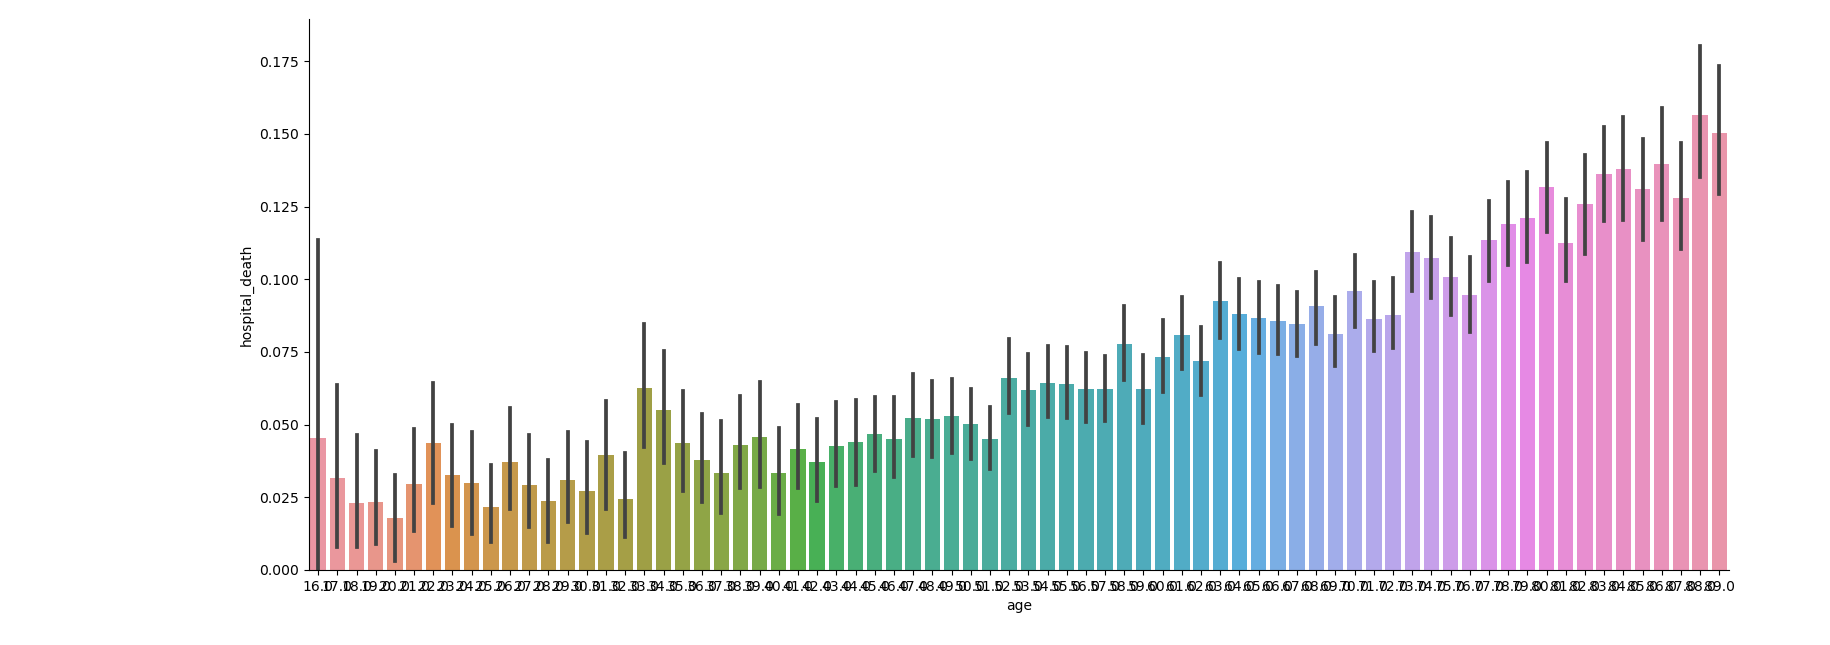

In [33]:

sb.catplot(x="age",y="hospital_death",kind="bar",data=data_train)
plt.show()#a lot of difference =» we keep; older people = more death

<IPython.core.display.Javascript object>


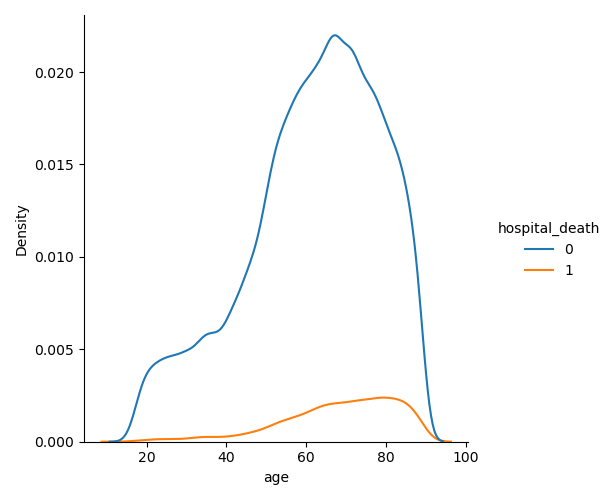

In [34]:
sb.displot(data=data_train, x="age", hue="hospital_death", kind="kde")
plt.show()

In [35]:
data_train["icu_id"].value_counts()

646    1325
653    1307
876    1284
413    1239
236    1140
337    1097
133    1042
434     993
840     945
404     944
895     942
114     942
376     907
369     902
657     883
391     882
92      881
855     868
504     849
608     839
464     824
513     820
95      820
622     816
324     802
498     799
489     792
711     777
798     765
408     751
809     736
687     735
685     734
251     734
709     716
678     712
619     709
623     679
697     678
684     673
212     672
841     667
97      664
628     657
384     657
347     646
374     645
616     640
451     634
491     633
829     621
869     619
490     604
495     603
543     600
523     591
90      580
594     580
609     563
259     563
601     559
775     558
889     556
607     554
394     545
267     542
307     542
286     539
708     539
683     529
481     528
185     526
377     525
538     522
647     516
512     505
100     503
430     497
426     495
632     492
549     488
694     485
831     483
428 

<IPython.core.display.Javascript object>


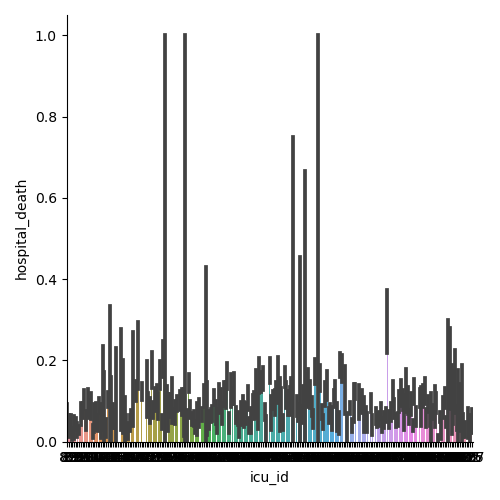

In [36]:
sb.catplot(x="icu_id",y="hospital_death",kind="bar",data=data_train)
plt.show()#a lot of difference =» we keep;

<IPython.core.display.Javascript object>


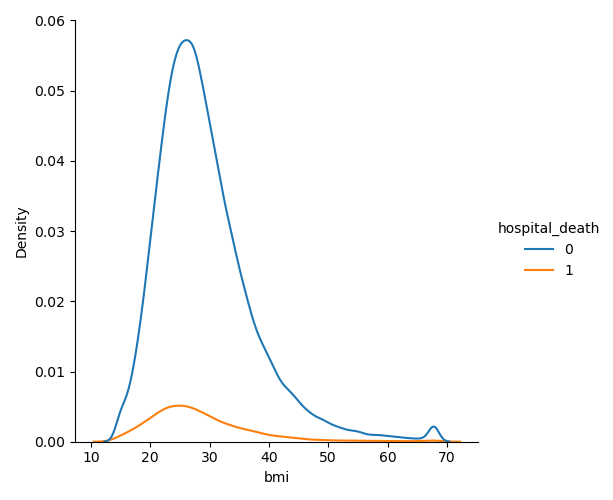

In [37]:
sb.displot(data=data_train, x="bmi", hue="hospital_death", kind="kde")
plt.show() #we need a kernel density estimate that plots dead vs. alive in a normalized way

<IPython.core.display.Javascript object>


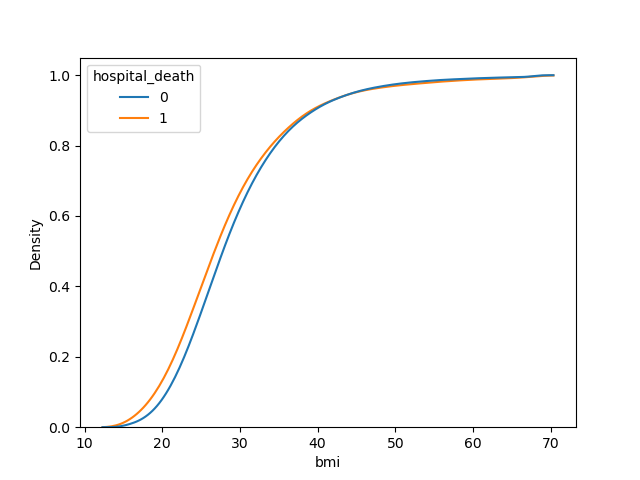

In [38]:
plt.figure()
sb.kdeplot(
    data=data_train, x="bmi", hue="hospital_death",
    cumulative=True, common_norm=False, common_grid=True,
)
plt.show()

In [39]:
data_train_clean=data_train_clean.drop("bmi", axis='columns') #even if the first kde seems to give us a lot of difference,
#in a normalised form we can see that no matter the bmi, dead vs. alive is kind of the same. =»

<IPython.core.display.Javascript object>


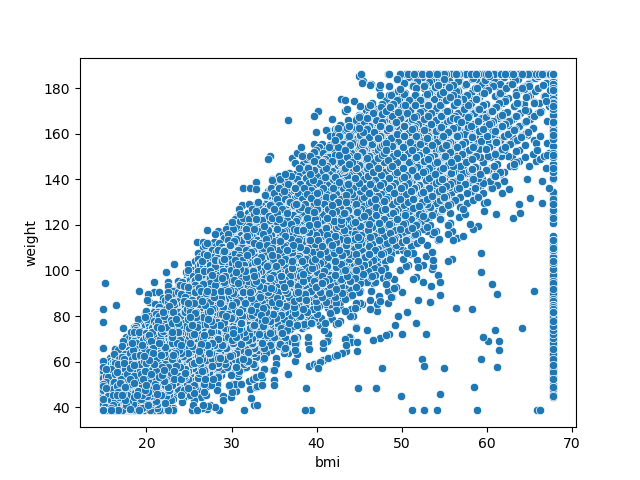

In [40]:
plt.figure()
sb.scatterplot(data=data_train, x="bmi", y="weight")
plt.show() #no real info, but it does seem like the bmi vs. weight follows the graph we expect from the equation: bmi=weight/height

<IPython.core.display.Javascript object>


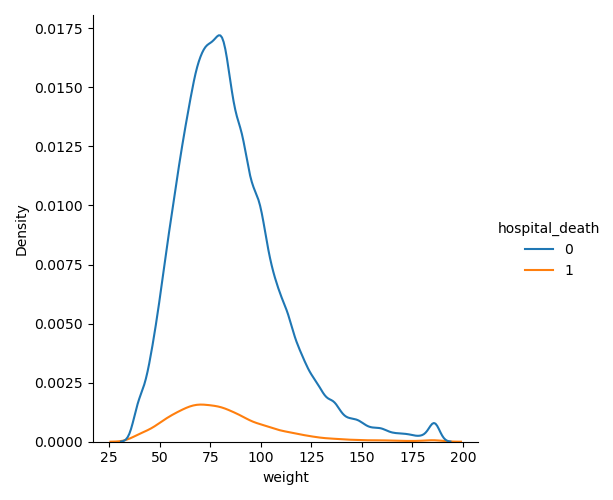

In [41]:
sb.displot(data=data_train, x="weight", hue="hospital_death", kind="kde")
plt.show() #same as for bmi

In [42]:
data_train_clean=data_train_clean.drop("weight", axis='columns')

<IPython.core.display.Javascript object>


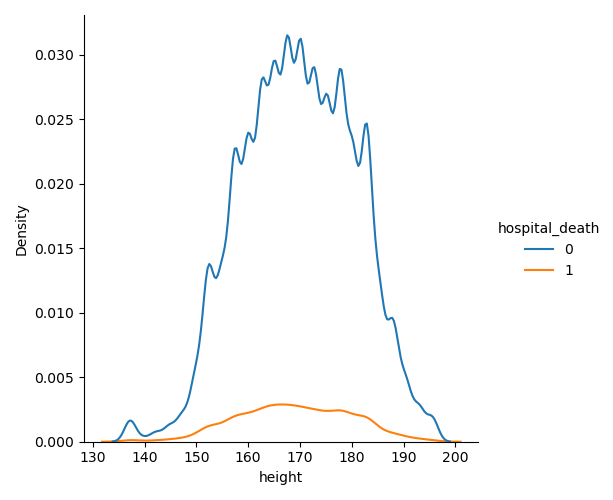

In [43]:
sb.displot(data=data_train, x="height", hue="hospital_death", kind="kde")
plt.show()

<IPython.core.display.Javascript object>


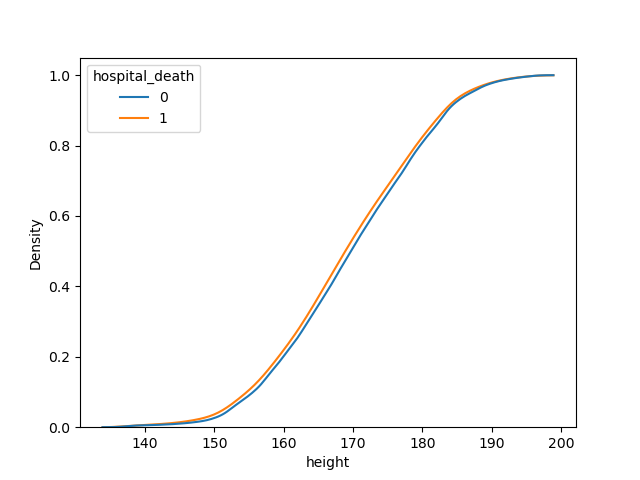

In [44]:
plt.figure()
sb.kdeplot(
    data=data_train, x="height", hue="hospital_death",
    cumulative=True, common_norm=False, common_grid=True,
)
plt.show()

In [45]:
data_train_clean=data_train_clean.drop("height", axis='columns')

<IPython.core.display.Javascript object>


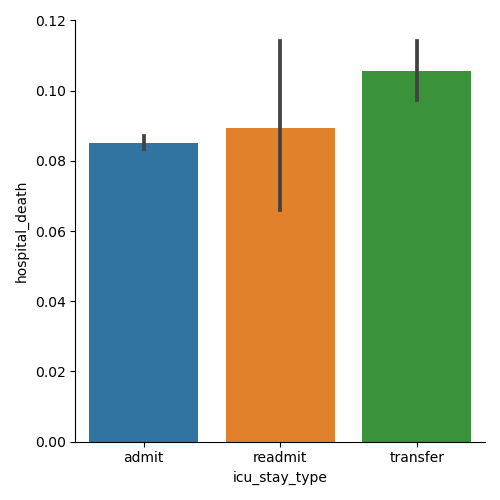

In [46]:
sb.catplot(x="icu_stay_type",y="hospital_death",kind="bar",data=data_train)
plt.show() 

<IPython.core.display.Javascript object>


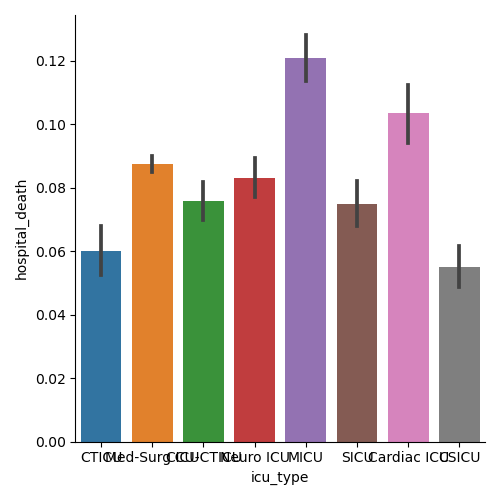

In [47]:
sb.catplot(x="icu_type",y="hospital_death",kind="bar",data=data_train)
plt.show()

In [48]:
data_train_clean=data_train_clean.drop("icu_stay_type", axis='columns') #the ICU type is more relevant than the stay type bc it
#is more varied

<IPython.core.display.Javascript object>


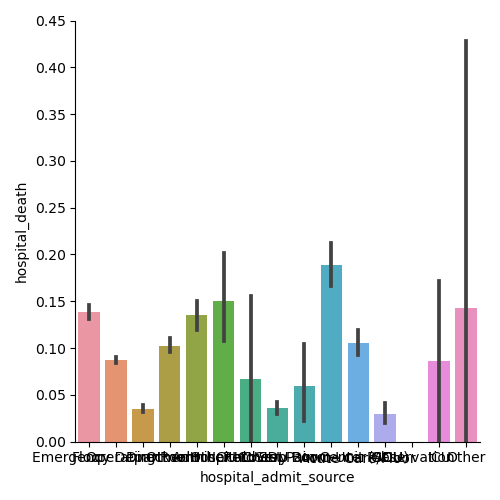

In [49]:
sb.catplot(x="hospital_admit_source",y="hospital_death",kind="bar",data=data_train)
plt.show()

<IPython.core.display.Javascript object>


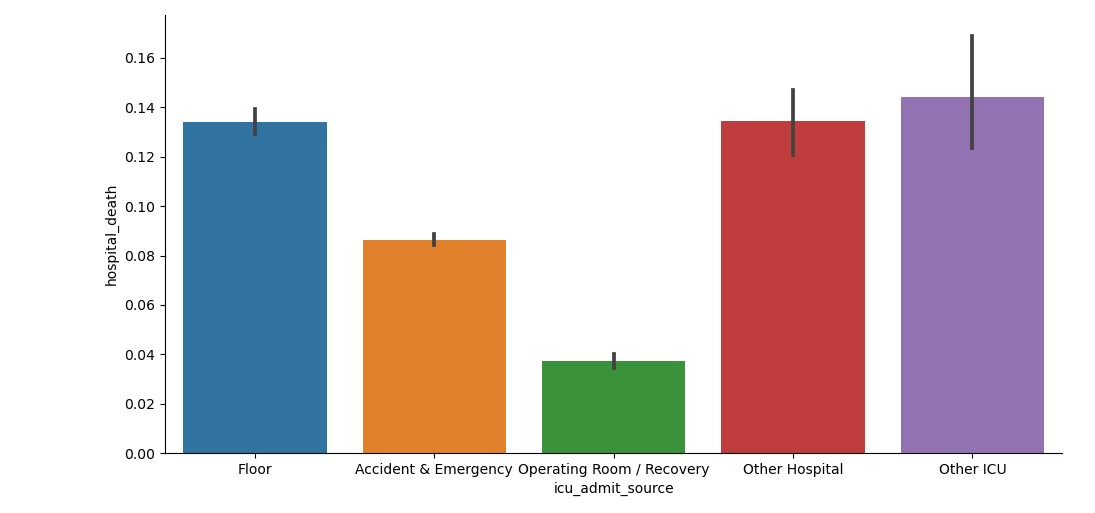

In [50]:
sb.catplot(x="icu_admit_source",y="hospital_death",kind="bar",data=data_train)
plt.show()

<IPython.core.display.Javascript object>


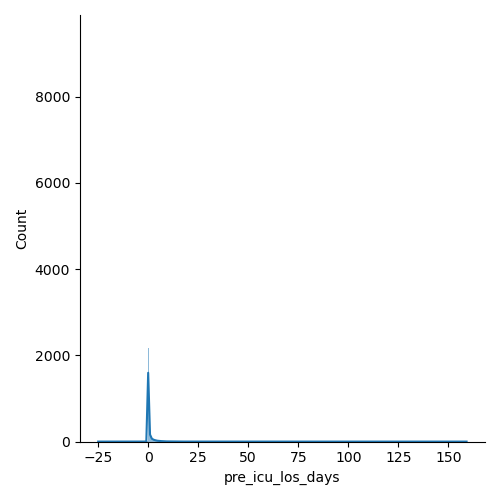

In [51]:
sb.displot(data=data_train, x="pre_icu_los_days", kde=True)
plt.show()

<IPython.core.display.Javascript object>


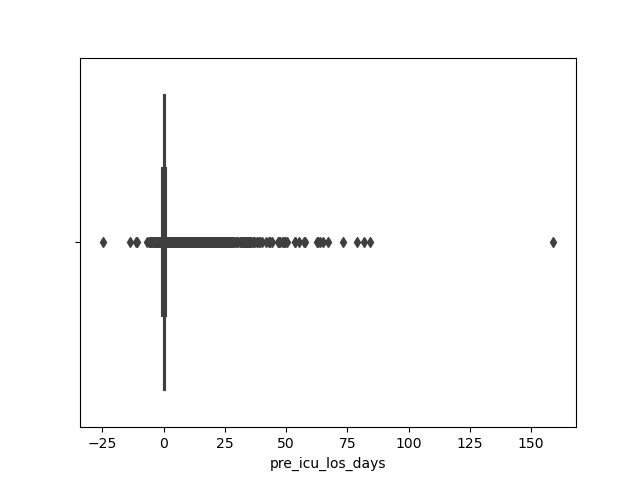

In [52]:
plt.figure()
sb.boxplot(data=data_train, x="pre_icu_los_days")
plt.show()

<IPython.core.display.Javascript object>


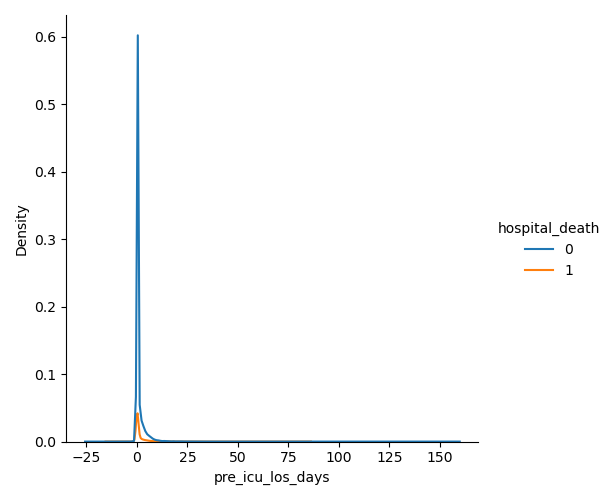

In [53]:
sb.displot(data=data_train, x="pre_icu_los_days", hue="hospital_death", kind="kde")
plt.show()

In [54]:
df=data_train[['patient_id','pre_icu_los_days']]

In [55]:
df[df.pre_icu_los_days>120]

patient_id  pre_icu_los_days
38854        8387        159.090972

In [56]:
data_train.drop(38854, inplace=True)

C:\Users\brian\AppData\Local\Temp\ipykernel_20148\1010699011.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


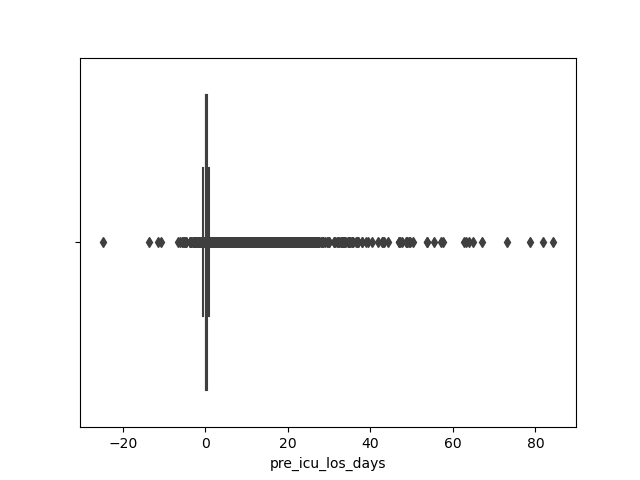

In [57]:
plt.figure()
sb.boxplot(data=data_train, x="pre_icu_los_days")
plt.show()

<IPython.core.display.Javascript object>


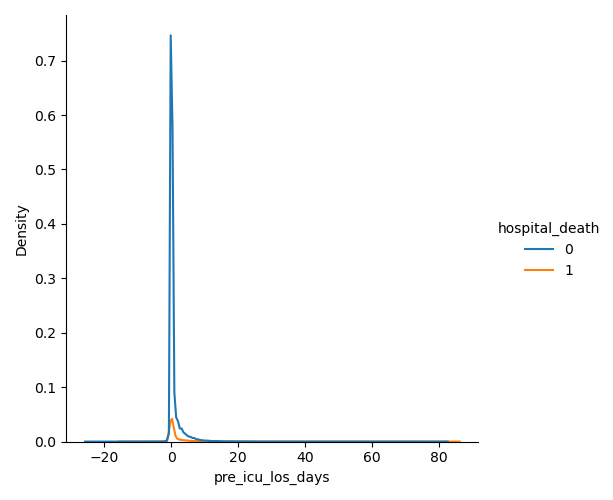

In [58]:
sb.displot(data=data_train, x="pre_icu_los_days", hue="hospital_death", kind="kde")
plt.show()

<IPython.core.display.Javascript object>


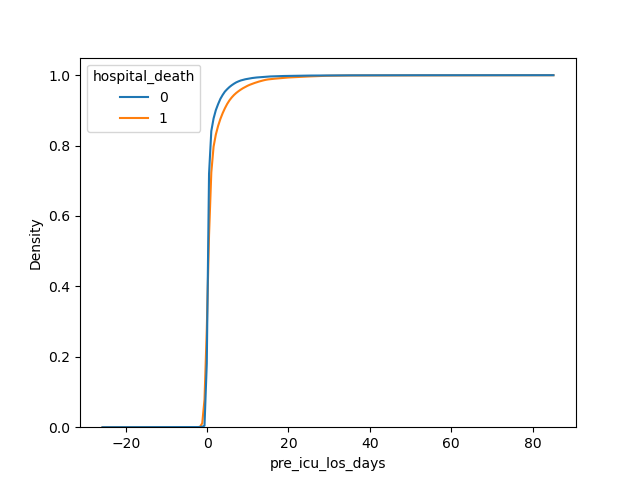

In [59]:
plt.figure()
sb.kdeplot(
    data=data_train, x="pre_icu_los_days", hue="hospital_death",
    cumulative=True, common_norm=False, common_grid=True,
)
plt.show()

In [60]:
data_train_clean=data_train_clean.drop("pre_icu_los_days", axis='columns') #not really enough difference

<IPython.core.display.Javascript object>


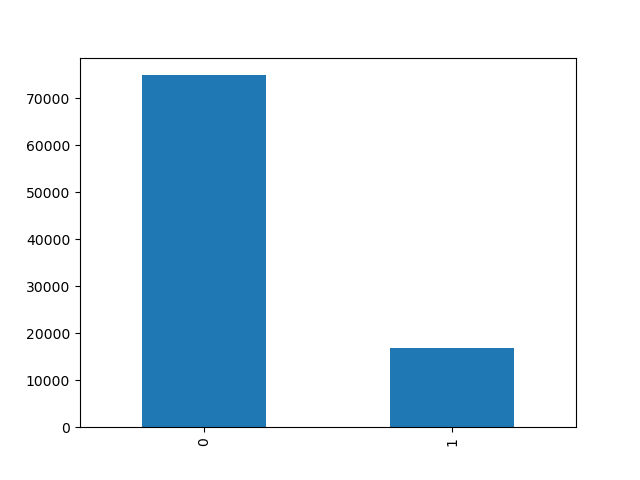

In [61]:
plt.figure()
data_train['elective_surgery'].value_counts().plot(kind='bar')
plt.show()

<IPython.core.display.Javascript object>


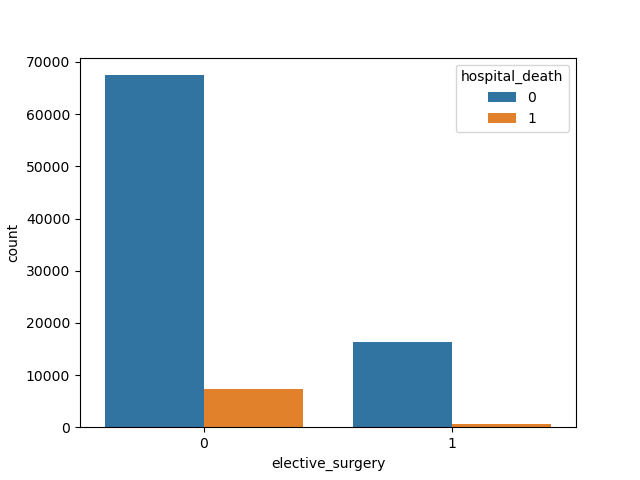

In [62]:
plt.figure()
sb.countplot(data=data_train, x="elective_surgery", hue="hospital_death")
plt.show()

<IPython.core.display.Javascript object>


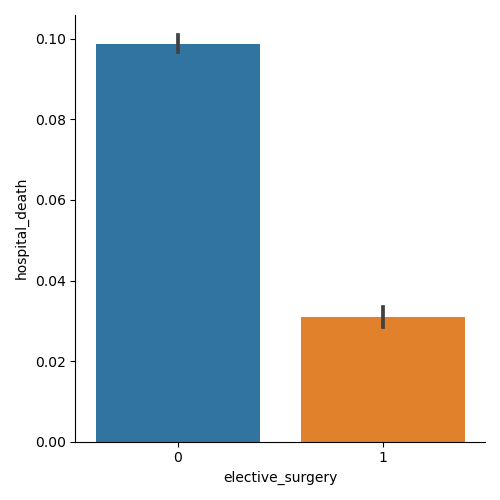

In [63]:
sb.catplot(x="elective_surgery",y="hospital_death",kind="bar",data=data_train)
plt.show()

In [64]:
print("Number of unique bodysystems for apache 3j: ",data_train['apache_3j_bodysystem'].nunique())

Number of unique bodysystems for apache 3j:  11


In [65]:
print("Number of unique bodysystems for apache 2: ",data_train['apache_2_bodysystem'].nunique())

Number of unique bodysystems for apache 2:  10


In [66]:
 print(data_test['apache_3j_bodysystem'].unique())

['Neurological' 'Cardiovascular' 'Respiratory' 'Sepsis' 'Trauma'
 'Metabolic' 'Gastrointestinal' 'Genitourinary' nan 'Musculoskeletal/Skin'
 'Hematological' 'Gynecological']


In [67]:
 print(data_test['apache_2_bodysystem'].unique())

['Neurologic' 'Cardiovascular' 'Respiratory' 'Trauma' 'Metabolic'
 'Gastrointestinal' 'Renal/Genitourinary' nan 'Undefined diagnoses'
 'Haematologic' 'Undefined Diagnoses']


In [68]:
data_train_clean=data_train_clean.drop("apache_2_bodysystem", axis='columns') #they are kind of the same as apache 3

<IPython.core.display.Javascript object>


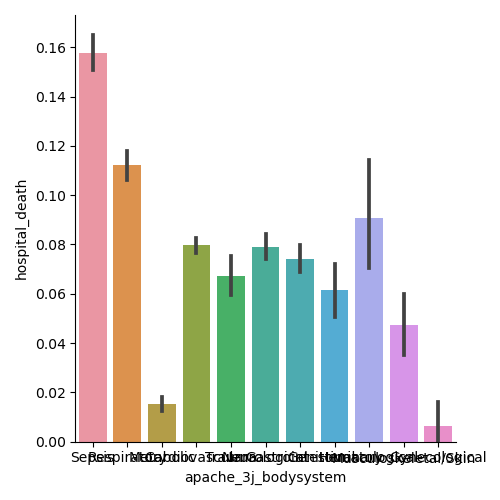

In [69]:
sb.catplot(x="apache_3j_bodysystem",y="hospital_death",kind="bar",data=data_train)
plt.show()

In [70]:
 print(data_dictionary[data_dictionary['Category']=="APACHE prediction"])

              Category                  Variable Name Unit of Measure  \
175  APACHE prediction  apache_4a_hospital_death_prob            None   
176  APACHE prediction       apache_4a_icu_death_prob            None   

    Data Type                                        Description Example  
175   numeric  The APACHE IVa probabilistic prediction of in-...    0.31  
176   numeric  The APACHE IVa probabilistic prediction of in ...    0.24  


In [71]:
 print(data_dictionary[data_dictionary['Category']=="identifier"])

     Category Variable Name Unit of Measure Data Type  \
0  identifier  encounter_id            None   integer   
1  identifier   hospital_id            None   integer   
2  identifier    patient_id            None   integer   

                                         Description Example  
0  Unique identifier associated with a patient un...    None  
1       Unique identifier associated with a hospital    None  
2        Unique identifier associated with a patient    None  


In [72]:
 print(data_dictionary[data_dictionary['Category']=="APACHE grouping"])

            Category         Variable Name Unit of Measure Data Type  \
185  APACHE grouping  apache_3j_bodysystem            None    string   
186  APACHE grouping   apache_2_bodysystem            None    string   

                                  Description         Example  
185  Admission diagnosis group for APACHE III  Cardiovascular  
186   Admission diagnosis group for APACHE II     Respiratory  


In [73]:
 print(data_dictionary[data_dictionary['Category']=="APACHE comorbidity"])

               Category                Variable Name Unit of Measure  \
177  APACHE comorbidity                         aids            None   
178  APACHE comorbidity                    cirrhosis            None   
179  APACHE comorbidity            diabetes_mellitus            None   
180  APACHE comorbidity              hepatic_failure            None   
181  APACHE comorbidity            immunosuppression            None   
182  APACHE comorbidity                     leukemia            None   
183  APACHE comorbidity                     lymphoma            None   
184  APACHE comorbidity  solid_tumor_with_metastasis            None   

    Data Type                                        Description Example  
177    binary  Whether the patient has a definitive diagnosis...       1  
178    binary  Whether the patient has a history of heavy alc...       1  
179    binary  Whether the patient has been diagnosed with di...       1  
180    binary  Whether the patient has cirrhosis an

In [74]:
 print(data_dictionary[data_dictionary['Category']=="demographic"])

       Category          Variable Name     Unit of Measure Data Type  \
3   demographic         hospital_death                None    binary   
4   demographic                    age               Years   numeric   
5   demographic                    bmi  kilograms/metres^2    string   
6   demographic       elective_surgery                None    binary   
7   demographic              ethnicity                None    string   
8   demographic                 gender                None    string   
9   demographic                 height         centimetres   numeric   
10  demographic  hospital_admit_source                None    string   
11  demographic       icu_admit_source                None    string   
12  demographic         icu_admit_type                None    string   
13  demographic                 icu_id                None   integer   
14  demographic          icu_stay_type                None    string   
15  demographic               icu_type                None    st

In [75]:
 print(data_dictionary[data_dictionary['Category']=="labs blood gas"])

           Category         Variable Name         Unit of Measure Data Type  \
159  labs blood gas  d1_arterial_pco2_max  Millimetres of mercury   numeric   
160  labs blood gas  d1_arterial_pco2_min  Millimetres of mercury   numeric   
161  labs blood gas    d1_arterial_ph_max                    None   numeric   
162  labs blood gas    d1_arterial_ph_min                    None   numeric   
163  labs blood gas   d1_arterial_po2_max  Millimetres of mercury   numeric   
164  labs blood gas   d1_arterial_po2_min  Millimetres of mercury   numeric   
165  labs blood gas  d1_pao2fio2ratio_max                Fraction   numeric   
166  labs blood gas  d1_pao2fio2ratio_min                Fraction   numeric   
167  labs blood gas  h1_arterial_pco2_max  Millimetres of mercury   numeric   
168  labs blood gas  h1_arterial_pco2_min  Millimetres of mercury   numeric   
169  labs blood gas    h1_arterial_ph_max                    None   numeric   
170  labs blood gas    h1_arterial_ph_min           

In [76]:
 print(data_dictionary[data_dictionary['Category']=="APACHE covariate"])

            Category          Variable Name         Unit of Measure Data Type  \
19  APACHE covariate         albumin_apache                     g/L   numeric   
20  APACHE covariate     apache_2_diagnosis                    None    string   
21  APACHE covariate    apache_3j_diagnosis                    None    string   
22  APACHE covariate  apache_post_operative                    None    binary   
23  APACHE covariate             arf_apache                    None    binary   
24  APACHE covariate       bilirubin_apache              micromol/L   numeric   
25  APACHE covariate             bun_apache                  mmol/L   numeric   
26  APACHE covariate      creatinine_apache              micromol/L   numeric   
27  APACHE covariate            fio2_apache                Fraction   numeric   
28  APACHE covariate        gcs_eyes_apache                    None   integer   
29  APACHE covariate       gcs_motor_apache                    None   integer   
30  APACHE covariate      gc

In [77]:
 print(data_dictionary[data_dictionary['Category']=="labs"])

    Category      Variable Name Unit of Measure Data Type  \
99      labs     d1_albumin_max            None   numeric   
100     labs     d1_albumin_min             g/L   numeric   
101     labs   d1_bilirubin_max      micromol/L   numeric   
102     labs   d1_bilirubin_min      micromol/L   numeric   
103     labs         d1_bun_max          mmol/L   numeric   
104     labs         d1_bun_min          mmol/L   numeric   
105     labs     d1_calcium_max          mmol/L   numeric   
106     labs     d1_calcium_min          mmol/L   numeric   
107     labs  d1_creatinine_max      micromol/L   numeric   
108     labs  d1_creatinine_min      micromol/L   numeric   
109     labs     d1_glucose_max          mmol/L   numeric   
110     labs     d1_glucose_min          mmol/L   numeric   
111     labs        d1_hco3_max          mmol/L   numeric   
112     labs        d1_hco3_min            None   numeric   
113     labs  d1_hemaglobin_max            g/dL   numeric   
114     labs  d1_hemaglo

In [78]:
 print(data_dictionary[data_dictionary['Category']=="vitals"])

   Category              Variable Name         Unit of Measure Data Type  \
47   vitals     d1_diasbp_invasive_max  Millimetres of mercury   numeric   
48   vitals     d1_diasbp_invasive_min  Millimetres of mercury   numeric   
49   vitals              d1_diasbp_max  Millimetres of mercury   numeric   
50   vitals              d1_diasbp_min  Millimetres of mercury   numeric   
51   vitals  d1_diasbp_noninvasive_max  Millimetres of mercury   numeric   
52   vitals  d1_diasbp_noninvasive_min  Millimetres of mercury   numeric   
53   vitals           d1_heartrate_max        Beats per minute   numeric   
54   vitals           d1_heartrate_min        Beats per minute   numeric   
55   vitals        d1_mbp_invasive_max  Millimetres of mercury   numeric   
56   vitals        d1_mbp_invasive_min  Millimetres of mercury   numeric   
57   vitals                 d1_mbp_max  Millimetres of mercury   numeric   
58   vitals                 d1_mbp_min  Millimetres of mercury   numeric   
59   vitals 

In [79]:
data_train[["apache_4a_hospital_death_prob","apache_4a_icu_death_prob"]].corr().style.background_gradient(cmap='coolwarm')

In [80]:
data_train_clean=data_train_clean.drop("apache_4a_hospital_death_prob", axis='columns')

In [81]:
mask = data_train_clean[['aids', 'leukemia', 'cirrhosis','diabetes_mellitus',
                     'hepatic_failure','immunosuppression','lymphoma',
                                'solid_tumor_with_metastasis']].notna().all(axis=1)
data_train_clean = data_train_clean[mask]
#bc .dropna makes it so that I can't use .head() or .shape

In [82]:
undf_clean=data_train_clean.isnull().sum()
print("\n\n", '\033[1m'+ 'Look for undefined:' + '\033[0m',"\n",undf_clean.sort_values())



 Look for undefined: 
 hospital_id                        0
intubated_apache                   0
solid_tumor_with_metastasis        0
aids                               0
cirrhosis                          0
diabetes_mellitus                  0
arf_apache                         0
apache_post_operative              0
hepatic_failure                    0
ventilated_apache                  0
icu_type                           0
icu_id                             0
leukemia                           0
elective_surgery                   0
lymphoma                           0
immunosuppression                  0
hospital_death                     0
icu_admit_source                 112
d1_heartrate_max                 138
d1_heartrate_min                 138
d1_sysbp_min                     152
d1_sysbp_max                     152
d1_diasbp_max                    158
d1_diasbp_min                    158
heart_rate_apache                163
d1_mbp_min                       213
d1_mbp_max   

In [83]:
data_train_clean.shape

(90998, 174)

In [84]:
data_train[["d1_arterial_pco2_max","d1_arterial_pco2_min","d1_arterial_ph_max","d1_arterial_ph_min",
           "d1_arterial_po2_max","d1_arterial_po2_min","d1_pao2fio2ratio_max","d1_pao2fio2ratio_min",
           "h1_arterial_pco2_max","h1_arterial_pco2_min","h1_arterial_ph_max","h1_arterial_ph_min",
           "h1_arterial_po2_max","h1_arterial_po2_min","h1_pao2fio2ratio_max","h1_pao2fio2ratio_min",
           ]].corr().style.background_gradient(cmap='coolwarm')

In [85]:
data_train_clean=data_train_clean.drop(["d1_arterial_pco2_max","d1_arterial_pco2_min","d1_arterial_ph_max",
                                       "d1_arterial_ph_min","d1_arterial_po2_max","d1_arterial_po2_min",
                                       "d1_pao2fio2ratio_max","d1_pao2fio2ratio_min"],axis=1)

In [86]:
columns_Apache_covar=data_dictionary[data_dictionary['Category']=="APACHE covariate"]
print(columns_Apache_covar)

            Category          Variable Name         Unit of Measure Data Type  \
19  APACHE covariate         albumin_apache                     g/L   numeric   
20  APACHE covariate     apache_2_diagnosis                    None    string   
21  APACHE covariate    apache_3j_diagnosis                    None    string   
22  APACHE covariate  apache_post_operative                    None    binary   
23  APACHE covariate             arf_apache                    None    binary   
24  APACHE covariate       bilirubin_apache              micromol/L   numeric   
25  APACHE covariate             bun_apache                  mmol/L   numeric   
26  APACHE covariate      creatinine_apache              micromol/L   numeric   
27  APACHE covariate            fio2_apache                Fraction   numeric   
28  APACHE covariate        gcs_eyes_apache                    None   integer   
29  APACHE covariate       gcs_motor_apache                    None   integer   
30  APACHE covariate      gc

In [87]:
abs(data_train[columns_Apache_covar["Variable Name"]].corr()).style.background_gradient(cmap='coolwarm') 

In [88]:
data_train_clean=data_train_clean.drop(["apache_3j_diagnosis","gcs_eyes_apache","gcs_motor_apache",
                                       "gcs_verbal_apache","paco2_apache"],axis=1)

In [89]:
columns_vitals=data_dictionary[data_dictionary['Category']=="vitals"]
print(columns_vitals)

   Category              Variable Name         Unit of Measure Data Type  \
47   vitals     d1_diasbp_invasive_max  Millimetres of mercury   numeric   
48   vitals     d1_diasbp_invasive_min  Millimetres of mercury   numeric   
49   vitals              d1_diasbp_max  Millimetres of mercury   numeric   
50   vitals              d1_diasbp_min  Millimetres of mercury   numeric   
51   vitals  d1_diasbp_noninvasive_max  Millimetres of mercury   numeric   
52   vitals  d1_diasbp_noninvasive_min  Millimetres of mercury   numeric   
53   vitals           d1_heartrate_max        Beats per minute   numeric   
54   vitals           d1_heartrate_min        Beats per minute   numeric   
55   vitals        d1_mbp_invasive_max  Millimetres of mercury   numeric   
56   vitals        d1_mbp_invasive_min  Millimetres of mercury   numeric   
57   vitals                 d1_mbp_max  Millimetres of mercury   numeric   
58   vitals                 d1_mbp_min  Millimetres of mercury   numeric   
59   vitals 

In [90]:
abs(data_train[columns_vitals["Variable Name"]].corr()).style.background_gradient(cmap='coolwarm') 

In [91]:
data_train_clean['d1_mbp_invasive_max']=data_train_clean['d1_mbp_invasive_max'].fillna(data_train_clean['d1_mbp_noninvasive_max'])

In [92]:
data_train_clean=data_train_clean.drop("d1_mbp_noninvasive_max", axis='columns')

In [93]:
data_train_clean['d1_diasbp_invasive_max']=data_train_clean['d1_diasbp_invasive_max'].fillna(data_train_clean['d1_diasbp_noninvasive_max'])

In [94]:
data_train_clean=data_train_clean.drop("d1_diasbp_noninvasive_max", axis='columns')

In [95]:
data_train_clean['d1_diasbp_invasive_min']=data_train_clean['d1_diasbp_invasive_min'].fillna(data_train_clean['d1_diasbp_noninvasive_min'])

In [96]:
data_train_clean=data_train_clean.drop("d1_diasbp_noninvasive_min", axis='columns')

In [97]:
data_train_clean['d1_mbp_invasive_min']=data_train_clean['d1_mbp_invasive_min'].fillna(data_train_clean['d1_mbp_noninvasive_min'])

In [98]:
data_train_clean=data_train_clean.drop("d1_mbp_noninvasive_min", axis='columns')

In [99]:
data_train_clean['d1_sysbp_invasive_max']=data_train_clean['d1_sysbp_invasive_max'].fillna(data_train_clean['d1_sysbp_noninvasive_max'])

In [100]:
data_train_clean=data_train_clean.drop("d1_sysbp_noninvasive_max", axis='columns')

In [101]:
data_train_clean['d1_sysbp_invasive_min']=data_train_clean['d1_sysbp_invasive_min'].fillna(data_train_clean['d1_sysbp_noninvasive_min'])

In [102]:
data_train_clean=data_train_clean.drop("d1_sysbp_noninvasive_min", axis='columns')

In [103]:
data_train_clean['h1_diasbp_invasive_max']=data_train_clean['h1_diasbp_invasive_max'].fillna(data_train_clean['h1_diasbp_noninvasive_max'])

In [104]:
data_train_clean=data_train_clean.drop("h1_diasbp_noninvasive_max", axis='columns')

In [105]:
data_train_clean['h1_diasbp_invasive_min']=data_train_clean['h1_diasbp_invasive_min'].fillna(data_train_clean['h1_diasbp_noninvasive_min'])

In [106]:
data_train_clean=data_train_clean.drop("h1_diasbp_noninvasive_min", axis='columns')

In [107]:
data_train_clean['h1_mbp_invasive_max']=data_train_clean['h1_mbp_invasive_max'].fillna(data_train_clean['h1_mbp_noninvasive_max'])

In [108]:
data_train_clean=data_train_clean.drop("h1_mbp_noninvasive_max", axis='columns')

In [109]:
data_train_clean['h1_sysbp_invasive_max']=data_train_clean['h1_sysbp_invasive_max'].fillna(data_train_clean['h1_sysbp_noninvasive_max'])

In [110]:
data_train_clean=data_train_clean.drop("h1_sysbp_noninvasive_max", axis='columns')

In [111]:
data_train_clean['h1_sysbp_invasive_min']=data_train_clean['h1_sysbp_invasive_min'].fillna(data_train_clean['h1_sysbp_noninvasive_min'])

In [112]:
data_train_clean=data_train_clean.drop("h1_sysbp_noninvasive_min", axis='columns')

In [113]:
columns_labs=data_dictionary[data_dictionary['Category']=="labs"]
print(columns_labs)

    Category      Variable Name Unit of Measure Data Type  \
99      labs     d1_albumin_max            None   numeric   
100     labs     d1_albumin_min             g/L   numeric   
101     labs   d1_bilirubin_max      micromol/L   numeric   
102     labs   d1_bilirubin_min      micromol/L   numeric   
103     labs         d1_bun_max          mmol/L   numeric   
104     labs         d1_bun_min          mmol/L   numeric   
105     labs     d1_calcium_max          mmol/L   numeric   
106     labs     d1_calcium_min          mmol/L   numeric   
107     labs  d1_creatinine_max      micromol/L   numeric   
108     labs  d1_creatinine_min      micromol/L   numeric   
109     labs     d1_glucose_max          mmol/L   numeric   
110     labs     d1_glucose_min          mmol/L   numeric   
111     labs        d1_hco3_max          mmol/L   numeric   
112     labs        d1_hco3_min            None   numeric   
113     labs  d1_hemaglobin_max            g/dL   numeric   
114     labs  d1_hemaglo

In [114]:
abs(data_train[columns_labs["Variable Name"]].corr()).style.background_gradient(cmap='coolwarm') 


In [115]:
data_train_clean=data_train_clean.drop(['d1_albumin_max','d1_albumin_min','d1_bilirubin_max','d1_bilirubin_min',
'd1_bun_max','d1_bun_min','d1_calcium_max','d1_calcium_min','d1_creatinine_max','d1_creatinine_min',
'd1_glucose_max','d1_glucose_min','d1_hco3_max','d1_hco3_min','d1_hemaglobin_max','d1_hemaglobin_min',
'd1_hematocrit_max','d1_hematocrit_min','d1_inr_max','d1_inr_min','d1_lactate_max','d1_lactate_min',
'd1_platelets_max','d1_platelets_min','d1_potassium_max','d1_potassium_min','d1_sodium_max',
'd1_sodium_min','d1_wbc_max','d1_wbc_min'], axis=1)

In [116]:
data_train_clean.head()

hospital_id  hospital_death   age  elective_surgery hospital_admit_source  \
0          118               0  68.0                 0                 Floor   
1           81               0  77.0                 0                 Floor   
2          118               0  25.0                 0  Emergency Department   
3          118               0  81.0                 1        Operating Room   
4           33               0  19.0                 0                   NaN   

            icu_admit_source  icu_id      icu_type  albumin_apache  \
0                      Floor      92         CTICU             2.3   
1                      Floor      90  Med-Surg ICU             NaN   
2       Accident & Emergency      93  Med-Surg ICU             NaN   
3  Operating Room / Recovery      92         CTICU             NaN   
4       Accident & Emergency      91  Med-Surg ICU             NaN   

   apache_2_diagnosis  apache_post_operative  arf_apache  bilirubin_apache  \
0               113.0                      0         0.0               0.4   
1               108.0                      0         0.0               NaN   
2               122.0                      0         0.0               NaN   
3               203.0                      1         0.0               NaN   
4               119.0                      0         0.0               NaN   

   bun_apache  creatinine_apache  fio2_apache  gcs_unable_apache  \
0        31.0               2.51          NaN                0.0   
1         9.0               0.56          1.0                0.0   
2         NaN                NaN          NaN                0.0   
3         NaN                NaN          0.6                0.0   
4         NaN                NaN          NaN                NaN   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0               27.4               0.0   
1           145.0              120.0               36.9               0.0   
2             NaN              102.0                NaN               0.0   
3           185.0              114.0               25.9               1.0   
4             NaN               60.0                NaN               0.0   

   map_apache  paco2_for_ph_apache  pao2_apache  ph_apache  resprate_apache  \
0        40.0                  NaN          NaN        NaN             36.0   
1        46.0                 37.0         51.0       7.45             33.0   
2        68.0                  NaN          NaN        NaN             37.0   
3        60.0                 30.0        142.0       7.39              4.0   
4       103.0                  NaN          NaN        NaN             16.0   

   sodium_apache  temp_apache  urineoutput_apache  ventilated_apache  \
0          134.0         39.3                 NaN                0.0   
1          145.0         35.1                 NaN                1.0   
2            NaN         36.7                 NaN                0.0   
3            NaN         34.8                 NaN                1.0   
4            NaN         36.7                 NaN                0.0   

   wbc_apache  d1_diasbp_invasive_max  d1_diasbp_invasive_min  d1_diasbp_max  \
0        14.1                    46.0                    32.0           68.0   
1        12.7                    95.0                    31.0           95.0   
2         NaN                    88.0                    48.0           88.0   
3         8.0                    62.0                    30.0           48.0   
4         NaN                    99.0                    57.0           99.0   

   d1_diasbp_min  d1_heartrate_max  d1_heartrate_min  d1_mbp_invasive_max  \
0           37.0             119.0              72.0                 66.0   
1           31.0             118.0              72.0                120.0   
2           48.0              96.0              68.0                102.0   
3           42.0             116.0              92.0           

In [117]:
data_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90998 entries, 0 to 91712
Columns: 120 entries, hospital_id to apache_3j_bodysystem
dtypes: float64(111), int64(5), object(4)
memory usage: 84.0+ MB


In [118]:
data_train_clean.shape

(90998, 120)

In [119]:
for i in data_train_clean.columns:
    print(i)

hospital_id
hospital_death
age
elective_surgery
hospital_admit_source
icu_admit_source
icu_id
icu_type
albumin_apache
apache_2_diagnosis
apache_post_operative
arf_apache
bilirubin_apache
bun_apache
creatinine_apache
fio2_apache
gcs_unable_apache
glucose_apache
heart_rate_apache
hematocrit_apache
intubated_apache
map_apache
paco2_for_ph_apache
pao2_apache
ph_apache
resprate_apache
sodium_apache
temp_apache
urineoutput_apache
ventilated_apache
wbc_apache
d1_diasbp_invasive_max
d1_diasbp_invasive_min
d1_diasbp_max
d1_diasbp_min
d1_heartrate_max
d1_heartrate_min
d1_mbp_invasive_max
d1_mbp_invasive_min
d1_mbp_max
d1_mbp_min
d1_resprate_max
d1_resprate_min
d1_spo2_max
d1_spo2_min
d1_sysbp_invasive_max
d1_sysbp_invasive_min
d1_sysbp_max
d1_sysbp_min
d1_temp_max
d1_temp_min
h1_diasbp_invasive_max
h1_diasbp_invasive_min
h1_diasbp_max
h1_diasbp_min
h1_heartrate_max
h1_heartrate_min
h1_mbp_invasive_max
h1_mbp_invasive_min
h1_mbp_max
h1_mbp_min
h1_mbp_noninvasive_min
h1_resprate_max
h1_resprate_mi

In [120]:
undf_clean=data_train_clean.isnull().sum()
print("\n\n", '\033[1m'+ 'Look for undefined:' + '\033[0m',"\n",undf_clean.sort_values())



 Look for undefined: 
 hospital_id                        0
ventilated_apache                  0
solid_tumor_with_metastasis        0
aids                               0
cirrhosis                          0
diabetes_mellitus                  0
arf_apache                         0
intubated_apache                   0
hepatic_failure                    0
apache_post_operative              0
icu_type                           0
icu_id                             0
leukemia                           0
elective_surgery                   0
lymphoma                           0
hospital_death                     0
immunosuppression                  0
icu_admit_source                 112
d1_heartrate_min                 138
d1_heartrate_max                 138
d1_sysbp_invasive_max            152
d1_sysbp_invasive_min            152
d1_sysbp_max                     152
d1_sysbp_min                     152
d1_diasbp_invasive_max           158
d1_diasbp_min                    158
d1_diasbp_max

In [121]:
categorical_features = ["hospital_id", "hospital_admit_source", "icu_admit_source", "icu_id", "icu_type", 
                        "apache_3j_bodysystem"]


In [122]:
# Print the number of unique values for each categorical feature
for feature in categorical_features:
    print(f"{feature}: {data_train_clean[feature].nunique()}")



hospital_id: 147
hospital_admit_source: 15
icu_admit_source: 5
icu_id: 241
icu_type: 8
apache_3j_bodysystem: 11


In [123]:
 print('Transform all String features to category.\n')
    #Convert string features to category data type and perform label encoding
for feature in categorical_features:
    # Convert the feature to string data type
    data_train_clean[feature] = data_train_clean[feature].astype('str')
    data_test[feature] = data_test[feature].astype('str')
    # Fit a LabelEncoder on the unique values of the feature from both the training and test datasets
    le = LabelEncoder().fit(np.unique(data_train_clean[feature].unique().tolist() + data_test[feature].unique().tolist()))
    # Transform the feature values using the fitted LabelEncoder
    data_train_clean[feature] = le.transform(data_train_clean[feature]) + 1
    data_test[feature] = le.transform(data_test[feature]) + 1
    # Replace NaN values with 0 and convert the feature to integer and then category data type
    data_train_clean[feature] = data_train_clean[feature].fillna(0).astype('int').astype('category')
    data_test[feature] = data_test[feature].fillna(0).astype('int').astype('category')


Transform all String features to category.



In [124]:
# Check for missing values in the categorical features
missing_categorical = data_train_clean[categorical_features].isna().sum(axis=0)
print(missing_categorical)

hospital_id              0
hospital_admit_source    0
icu_admit_source         0
icu_id                   0
icu_type                 0
apache_3j_bodysystem     0
dtype: int64


In [125]:
# Define lists of categorical and numeric columns
categorical_columns = ["hospital_id", "hospital_admit_source", "icu_admit_source", "icu_id", "icu_type", "apache_3j_bodysystem"]
numeric_columns = ['age','elective_surgery','albumin_apache','apache_2_diagnosis','apache_post_operative',
'arf_apache','bilirubin_apache','bun_apache','creatinine_apache','fio2_apache','gcs_unable_apache','glucose_apache',
'heart_rate_apache','hematocrit_apache','intubated_apache','map_apache','paco2_for_ph_apache','pao2_apache','ph_apache',
'resprate_apache','sodium_apache','temp_apache','urineoutput_apache','ventilated_apache','wbc_apache','d1_diasbp_invasive_max',
'd1_diasbp_invasive_min','d1_diasbp_max','d1_diasbp_min','d1_heartrate_max','d1_heartrate_min','d1_mbp_invasive_max',
'd1_mbp_invasive_min','d1_mbp_max','d1_mbp_min','d1_resprate_max','d1_resprate_min','d1_spo2_max','d1_spo2_min',
'd1_sysbp_invasive_max','d1_sysbp_invasive_min','d1_sysbp_max','d1_sysbp_min','d1_temp_max','d1_temp_min',
'h1_diasbp_invasive_max','h1_diasbp_invasive_min','h1_diasbp_max','h1_diasbp_min','h1_heartrate_max','h1_heartrate_min',
'h1_mbp_invasive_max','h1_mbp_invasive_min','h1_mbp_max','h1_mbp_min','h1_mbp_noninvasive_min','h1_resprate_max',
'h1_resprate_min','h1_spo2_max','h1_spo2_min','h1_sysbp_invasive_max','h1_sysbp_invasive_min','h1_sysbp_max','h1_sysbp_min',
'h1_temp_max','h1_temp_min','h1_albumin_max','h1_albumin_min','h1_bilirubin_max','h1_bilirubin_min','h1_bun_max','h1_bun_min',
'h1_calcium_max','h1_calcium_min','h1_creatinine_max','h1_creatinine_min','h1_glucose_max','h1_glucose_min','h1_hco3_max',
'h1_hco3_min','h1_hemaglobin_max','h1_hemaglobin_min','h1_hematocrit_max','h1_hematocrit_min','h1_inr_max','h1_inr_min',
'h1_lactate_max','h1_lactate_min','h1_platelets_max','h1_platelets_min','h1_potassium_max','h1_potassium_min','h1_sodium_max',
'h1_sodium_min','h1_wbc_max','h1_wbc_min','h1_arterial_pco2_max','h1_arterial_pco2_min','h1_arterial_ph_max','h1_arterial_ph_min',
'h1_arterial_po2_max','h1_arterial_po2_min','h1_pao2fio2ratio_max','h1_pao2fio2ratio_min','apache_4a_icu_death_prob','aids',
'cirrhosis','diabetes_mellitus','hepatic_failure','immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis']


In [126]:
# Check for missing values in the numeric columns
missing_numeric = data_train_clean[numeric_columns].isna().sum(axis=0)
print("\n\n", '\033[1m'+ 'Look for missing:' + '\033[0m',"\n",missing_numeric.sort_values())



 Look for missing: 
 solid_tumor_with_metastasis        0
ventilated_apache                  0
intubated_apache                   0
lymphoma                           0
aids                               0
cirrhosis                          0
hepatic_failure                    0
diabetes_mellitus                  0
arf_apache                         0
apache_post_operative              0
leukemia                           0
elective_surgery                   0
immunosuppression                  0
d1_heartrate_max                 138
d1_heartrate_min                 138
d1_sysbp_min                     152
d1_sysbp_max                     152
d1_sysbp_invasive_max            152
d1_sysbp_invasive_min            152
d1_diasbp_invasive_max           158
d1_diasbp_invasive_min           158
d1_diasbp_max                    158
d1_diasbp_min                    158
heart_rate_apache                163
d1_mbp_min                       213
d1_mbp_invasive_max              213
d1_mbp_invasive

In [127]:
# Remove rows with all missing values from the dataset
data_train_clean = data_train_clean.dropna(how="all")

In [128]:
# Get the labels from missing_numeric that are less than 10000
labels_to_replace = missing_numeric[missing_numeric < 10000].index.tolist()

In [129]:
print(labels_to_replace)

['age', 'elective_surgery', 'apache_2_diagnosis', 'apache_post_operative', 'arf_apache', 'gcs_unable_apache', 'heart_rate_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_invasive_max', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_sysbp_max', 'h1_sysbp_min', 'apache_4a_icu_death_prob', 'aids', 'cirrhosis'

In [130]:
#Iterate over the labels to replace and perform the replacement
for label in labels_to_replace:
    mask_new = data_train_clean[[label]].notna().all(axis=1)
    data_train_clean = data_train_clean[mask_new]

In [131]:
# Check for missing values in the numeric columns
missing_numeric = data_train_clean[numeric_columns].isna().sum(axis=0)
print("\n\n", '\033[1m'+ 'Look for missing:' + '\033[0m',"\n",missing_numeric.sort_values())



 Look for missing: 
 age                                0
h1_mbp_invasive_max                0
h1_heartrate_min                   0
h1_heartrate_max                   0
h1_diasbp_min                      0
h1_diasbp_max                      0
h1_diasbp_invasive_min             0
h1_mbp_max                         0
h1_diasbp_invasive_max             0
d1_temp_max                        0
d1_sysbp_min                       0
d1_sysbp_max                       0
d1_sysbp_invasive_min              0
d1_sysbp_invasive_max              0
d1_spo2_min                        0
d1_temp_min                        0
d1_spo2_max                        0
h1_mbp_min                         0
lymphoma                           0
leukemia                           0
immunosuppression                  0
hepatic_failure                    0
diabetes_mellitus                  0
cirrhosis                          0
aids                               0
h1_mbp_noninvasive_min             0
apache_4a_icu_d

In [132]:
data_train_clean.shape

(66828, 120)

In [133]:
mask_new = data_train_clean[['glucose_apache']].notna().all(axis=1)
data_train_clean = data_train_clean[mask_new]

In [134]:
# Check for missing values in the numeric columns
missing_numeric = data_train_clean[numeric_columns].isna().sum(axis=0)
print("\n\n", '\033[1m'+ 'Look for missing:' + '\033[0m',"\n",missing_numeric.sort_values())



 Look for missing: 
 age                                0
h1_mbp_invasive_max                0
h1_heartrate_min                   0
h1_heartrate_max                   0
h1_diasbp_min                      0
h1_diasbp_max                      0
h1_diasbp_invasive_min             0
h1_mbp_max                         0
h1_diasbp_invasive_max             0
d1_temp_max                        0
d1_sysbp_min                       0
d1_sysbp_max                       0
d1_sysbp_invasive_min              0
d1_sysbp_invasive_max              0
d1_spo2_min                        0
d1_temp_min                        0
d1_spo2_max                        0
h1_mbp_min                         0
lymphoma                           0
leukemia                           0
immunosuppression                  0
hepatic_failure                    0
diabetes_mellitus                  0
cirrhosis                          0
aids                               0
h1_mbp_noninvasive_min             0
apache_4a_icu_d

In [135]:
data_train_clean.shape

(59510, 120)

In [136]:
mask_new = data_train_clean[['sodium_apache','creatinine_apache','bun_apache']].notna().all(axis=1)
data_train_clean = data_train_clean[mask_new]

In [137]:
data_train_clean.shape

(53543, 120)

In [138]:
# Check for missing values in the numeric columns
missing_numeric = data_train_clean[numeric_columns].isna().sum(axis=0)
print("\n\n", '\033[1m'+ 'Look for missing:' + '\033[0m',"\n",missing_numeric.sort_values())



 Look for missing: 
 age                                0
h1_mbp_invasive_max                0
h1_heartrate_min                   0
h1_heartrate_max                   0
h1_diasbp_min                      0
h1_diasbp_max                      0
h1_diasbp_invasive_min             0
h1_mbp_max                         0
h1_diasbp_invasive_max             0
d1_temp_max                        0
d1_sysbp_min                       0
d1_sysbp_max                       0
d1_sysbp_invasive_min              0
d1_sysbp_invasive_max              0
d1_spo2_min                        0
d1_temp_min                        0
d1_spo2_max                        0
h1_mbp_min                         0
lymphoma                           0
leukemia                           0
immunosuppression                  0
hepatic_failure                    0
diabetes_mellitus                  0
cirrhosis                          0
aids                               0
h1_mbp_noninvasive_min             0
apache_4a_icu_d

In [139]:
mask_new = data_train_clean[['hematocrit_apache','wbc_apache']].notna().all(axis=1)
data_train_clean = data_train_clean[mask_new]

In [140]:
data_train_clean.shape

(48877, 120)

In [141]:
# Check for missing values in the numeric columns
missing_numeric = data_train_clean[numeric_columns].isna().sum(axis=0)
print("\n\n", '\033[1m'+ 'Look for missing:' + '\033[0m',"\n",missing_numeric.sort_values())



 Look for missing: 
 age                                0
h1_mbp_invasive_max                0
h1_heartrate_min                   0
h1_heartrate_max                   0
h1_diasbp_min                      0
h1_diasbp_max                      0
h1_diasbp_invasive_min             0
h1_mbp_max                         0
h1_diasbp_invasive_max             0
d1_temp_max                        0
d1_sysbp_min                       0
d1_sysbp_max                       0
d1_sysbp_invasive_min              0
d1_sysbp_invasive_max              0
d1_spo2_min                        0
d1_temp_min                        0
d1_spo2_max                        0
h1_mbp_min                         0
lymphoma                           0
leukemia                           0
immunosuppression                  0
hepatic_failure                    0
diabetes_mellitus                  0
cirrhosis                          0
aids                               0
h1_mbp_noninvasive_min             0
apache_4a_icu_d

In [142]:
labels_to_drop = missing_numeric[missing_numeric > 9000].index.tolist()

In [143]:
print(labels_to_drop)

['albumin_apache', 'bilirubin_apache', 'fio2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'urineoutput_apache', 'h1_mbp_invasive_min', 'h1_temp_max', 'h1_temp_min', 'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min', 'h1_sodium_max', 'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min', 'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min']


In [144]:
data_train_clean = data_train_clean.drop(labels_to_drop, axis=1)

In [145]:
# Check for missing values in the numeric columns
missing_all = data_train_clean.isna().sum(axis=0)
print("\n\n", '\033[1m'+ 'Look for missing:' + '\033[0m',"\n",missing_all.sort_values())



 Look for missing: 
 hospital_id                    0
h1_mbp_max                     0
h1_mbp_invasive_max            0
h1_heartrate_min               0
h1_heartrate_max               0
h1_diasbp_min                  0
h1_diasbp_max                  0
h1_mbp_min                     0
h1_diasbp_invasive_min         0
d1_temp_min                    0
d1_temp_max                    0
d1_sysbp_min                   0
d1_sysbp_max                   0
d1_sysbp_invasive_min          0
d1_sysbp_invasive_max          0
h1_diasbp_invasive_max         0
d1_spo2_min                    0
h1_mbp_noninvasive_min         0
h1_resprate_min                0
lymphoma                       0
leukemia                       0
immunosuppression              0
hepatic_failure                0
diabetes_mellitus              0
cirrhosis                      0
h1_resprate_max                0
aids                           0
h1_sysbp_min                   0
h1_sysbp_max                   0
h1_sysbp_invasive_mi

In [146]:
data_train_clean.shape

(48877, 72)

In [148]:
data_train_clean.head()

hospital_id  hospital_death   age  elective_surgery hospital_admit_source  \
0          22               0  68.0                 0                     5   
1         185               0  77.0                 0                     5   
5         187               0  67.0                 0                     3   
6         187               0  59.0                 0                     9   
7         132               0  70.0                 0                     4   

  icu_admit_source icu_id icu_type  apache_2_diagnosis  apache_post_operative  \
0                2    286        3               113.0                      0   
1                2    274        6               108.0                      0   
5                1    293        6               301.0                      0   
6                1    293        6               108.0                      0   
7                1    282        6               113.0                      0   

   arf_apache  bun_apache  creatinine_apache  gcs_unable_apache  \
0         0.0        31.0               2.51                0.0   
1         0.0         9.0               0.56                0.0   
5         0.0        13.0               0.71                0.0   
6         0.0        18.0               0.78                0.0   
7         0.0        48.0               2.05                0.0   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0               27.4               0.0   
1           145.0              120.0               36.9               0.0   
5           156.0              113.0               44.2               0.0   
6           197.0              133.0               33.5               1.0   
7           164.0              120.0               22.6               0.0   

   map_apache  resprate_apache  sodium_apache  temp_apache  ventilated_apache  \
0        40.0             36.0          134.0         39.3                0.0   
1        46.0             33.0          145.0         35.1                1.0   
5       130.0             35.0          137.0         36.6                0.0   
6       138.0             53.0          135.0         35.0                1.0   
7        60.0             28.0          140.0         36.6                1.0   

   wbc_apache  d1_diasbp_invasive_max  d1_diasbp_invasive_min  d1_diasbp_max  \
0        14.1                    46.0                    32.0           68.0   
1        12.7                    95.0                    31.0           95.0   
5        10.9                   100.0                    61.0          100.0   
6         5.9                   107.0                    65.0           76.0   
7        12.8                    84.0                    46.0           84.0   

   d1_diasbp_min  d1_heartrate_max  d1_heartrate_min  d1_mbp_invasive_max  \
0           37.0             119.0              72.0                 66.0   
1           31.0             118.0              72.0                120.0   
5           61.0             113.0              83.0                127.0   
6           68.0             112.0              70.0                138.0   
7           46.0             118.0              86.0                114.0   

   d1_mbp_invasive_min  d1_mbp_max  d1_mbp_min  d1_resprate_max  \
0                 40.0        89.0        46.0             34.0   
1                 38.0       120.0        38.0             32.0   
5                 80.0       127.0        80.0             32.0   
6                 84.0       117.0        97.0             38.0   
7                 60.0       114.0        60.0             28.0   

   d1_resprate_min  d1_spo2_max  d1_spo2_min  d1_sysbp_invasive_max  \
0             10.0        100.0         74.0                  122.0   
1             12.0        100.0         70.0                  159.0   
5             10.0         97.0         91.0                  173.0   
6             16.0        100.0         87.0            

<IPython.core.display.Javascript object>


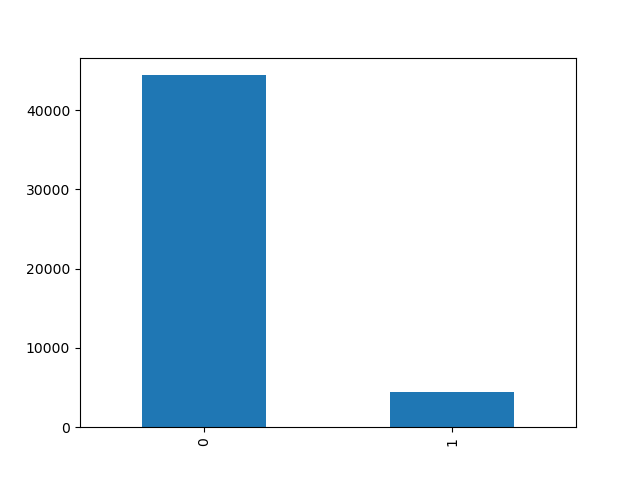

In [147]:
plt.figure()
data_train_clean['hospital_death'].value_counts().plot(kind='bar')
plt.show()

In [149]:
column_names = data_train_clean.columns.tolist()
print('Column Names in data_test_clean:')
for column_name in column_names:
    print(column_name)

Column Names in data_test_clean:
hospital_id
hospital_death
age
elective_surgery
hospital_admit_source
icu_admit_source
icu_id
icu_type
apache_2_diagnosis
apache_post_operative
arf_apache
bun_apache
creatinine_apache
gcs_unable_apache
glucose_apache
heart_rate_apache
hematocrit_apache
intubated_apache
map_apache
resprate_apache
sodium_apache
temp_apache
ventilated_apache
wbc_apache
d1_diasbp_invasive_max
d1_diasbp_invasive_min
d1_diasbp_max
d1_diasbp_min
d1_heartrate_max
d1_heartrate_min
d1_mbp_invasive_max
d1_mbp_invasive_min
d1_mbp_max
d1_mbp_min
d1_resprate_max
d1_resprate_min
d1_spo2_max
d1_spo2_min
d1_sysbp_invasive_max
d1_sysbp_invasive_min
d1_sysbp_max
d1_sysbp_min
d1_temp_max
d1_temp_min
h1_diasbp_invasive_max
h1_diasbp_invasive_min
h1_diasbp_max
h1_diasbp_min
h1_heartrate_max
h1_heartrate_min
h1_mbp_invasive_max
h1_mbp_max
h1_mbp_min
h1_mbp_noninvasive_min
h1_resprate_max
h1_resprate_min
h1_spo2_max
h1_spo2_min
h1_sysbp_invasive_max
h1_sysbp_invasive_min
h1_sysbp_max
h1_sysbp_

In [147]:
data_train_clean.to_csv(r'C:\Users\brian\OneDrive\Desktop\Documente licență\Documenație scrisă\Date_clean.csv',index=False)

# BLR Model Training

In [953]:
# X_train, X_eval, = train_test_split(data_train_clean, test_size = 0.3, train_size=0.7)

In [954]:
# X_train_final = X_train.pop('hospital_death') 
# X_eval_final = X_eval.pop('hospital_death')

In [955]:
# CATEGORICAL_COLUMNS = ["hospital_id", "hospital_admit_source",
#                         "icu_admit_source","icu_id","icu_type",
#                          "apache_3j_bodysystem"]
# NUMERIC_COLUMNS = [
# 'h1_mbp_max','h1_mbp_invasive_max','h1_heartrate_min','h1_heartrate_max','h1_diasbp_min','h1_diasbp_max',
    
# 'h1_mbp_min','h1_diasbp_invasive_min','d1_temp_min','d1_temp_max','d1_sysbp_min','d1_sysbp_max',
    
# 'd1_sysbp_invasive_min','d1_sysbp_invasive_max','h1_diasbp_invasive_max','d1_spo2_min','h1_mbp_noninvasive_min',
    
# 'h1_resprate_min','leukemia','lymphoma','cirrhosis','diabetes_mellitus','hepatic_failure','immunosuppression',
    
# 'h1_resprate_max','aids','h1_sysbp_max','h1_sysbp_min','h1_sysbp_invasive_max','h1_sysbp_invasive_min',
    
# 'solid_tumor_with_metastasis','h1_spo2_max','h1_spo2_min','apache_4a_icu_death_prob','d1_spo2_max',
    
# 'd1_resprate_max','d1_resprate_min','glucose_apache','gcs_unable_apache','creatinine_apache','bun_apache','arf_apache',
    
# 'apache_post_operative','heart_rate_apache','apache_2_diagnosis',
    
# 'elective_surgery','age','hematocrit_apache','intubated_apache','map_apache','d1_mbp_min',
    
# 'd1_mbp_max','d1_mbp_invasive_min','d1_mbp_invasive_max','d1_heartrate_min','d1_heartrate_max','d1_diasbp_min','d1_diasbp_max',
    
# 'd1_diasbp_invasive_min','d1_diasbp_invasive_max','wbc_apache','ventilated_apache','temp_apache','sodium_apache',
    
# 'resprate_apache'
# ]

# feature_columns = []
# for feature_name in CATEGORICAL_COLUMNS:
#     vocabulary = X_train[feature_name].unique()
#     feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

# for feature_name in NUMERIC_COLUMNS:
#     feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))



In [963]:
# # Define input functions
# def make_input_fn(data_df, label_df, num_epochs=15, shuffle=True, batch_size=50):
#     def input_function():
#         ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
#         if shuffle:
#             ds = ds.shuffle(200)
#         ds = ds.batch(batch_size).repeat(num_epochs)
#         return ds
#     return input_function


# # Create the labels array for cross-validation
# labels_array = np.array(X_train_final)



# # Perform cross-validation
# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# fold_scores = []


# for train_indices, eval_indices in kfold.split(X_train, labels_array):
#     train_data = X_train.iloc[train_indices]
#     train_labels = labels_array[train_indices]
#     eval_data = X_train.iloc[eval_indices]
#     eval_labels = labels_array[eval_indices]

#     train_input_fn = make_input_fn(train_data, train_labels)
#     eval_input_fn = make_input_fn(eval_data, eval_labels, num_epochs=1, shuffle=False)

#     # Define the regularized optimizer
# optimizer = tf.keras.optimizers.legacy.Ftrl(learning_rate=0.1, l1_regularization_strength=0.01, l2_regularization_strength=0.01)

#     # Define the LinearClassifier model
# linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns, optimizer=optimizer)

#     # Train the model
# linear_est.train(train_input_fn)

#     # Evaluate the model
# result = linear_est.evaluate(eval_input_fn)

# fold_scores.append(result['accuracy'])


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\brian\\AppData\\Local\\Temp\\tmpnvh7fmc6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorf

KeyboardInterrupt: 

In [754]:

# #     # Evaluate the model and predict probabilities
# # result = linear_est.evaluate(eval_input_fn)
# # clear_output()
# print("Accuracy: {:.4f}".format(result['accuracy']))

# fold_scores.append(result['accuracy'])

# # Calculate the average accuracy across folds
# average_accuracy = np.mean(fold_scores)

# print("Average Accuracy: {:.4f}".format(average_accuracy))

Accuracy: 0.9202
Average Accuracy: 0.9202


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\brian\AppData\Local\Temp\tmpbeb4krod\model.ckpt-8220
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<IPython.core.display.Javascript object>


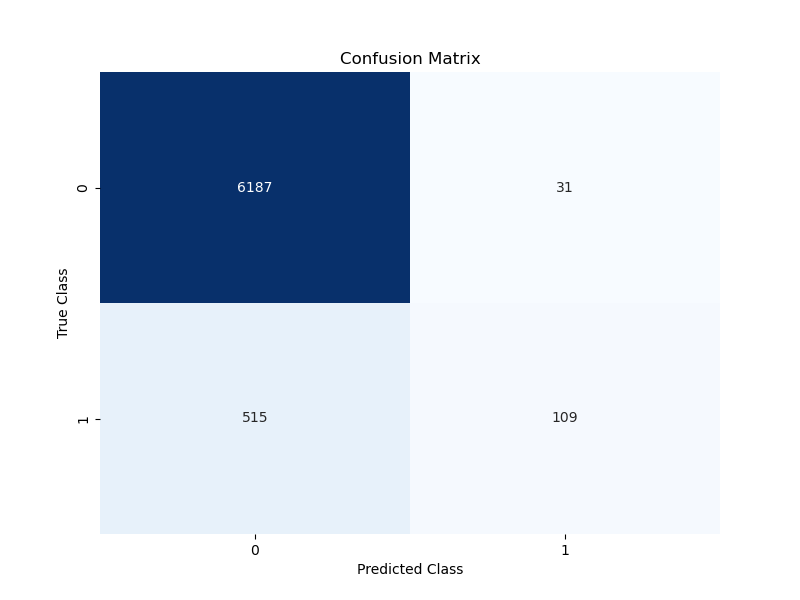

In [760]:

# # Create an input function for making predictions
# predict_input_fn = make_input_fn(eval_data, eval_labels, num_epochs=1, shuffle=False)

# # Make predictions using the trained model
# predictions = list(linear_est.predict(predict_input_fn))
# predicted_classes = [prediction['class_ids'][0] for prediction in predictions]

# # Compute the confusion matrix
# cm = confusion_matrix(eval_labels, predicted_classes)

# # Create a seaborn heatmap for the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
#             xticklabels=["0", "1"], yticklabels=["0", "1"])
# plt.xlabel("Predicted Class")
# plt.ylabel("True Class")
# plt.title("Confusion Matrix")
# plt.show()

In [762]:
# from sklearn.metrics import classification_report
# # Compute the classification report
# report = classification_report(eval_labels, predicted_classes)

# # Print the classification report
# print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      6218
           1       0.78      0.17      0.29       624

    accuracy                           0.92      6842
   macro avg       0.85      0.58      0.62      6842
weighted avg       0.91      0.92      0.90      6842



# ANN Model

In [792]:
# X_ANN = data_train_clean.drop('hospital_death', axis=1)
# y_ANN = data_train_clean['hospital_death']
# X_train_ANN, X_test_ANN, y_train_ANN, y_test_ANN = train_test_split(X_ANN, y_ANN, test_size=0.3, random_state=42)

In [793]:
# scaler = StandardScaler()
# X_train_ANN = scaler.fit_transform(X_train_ANN)
# X_test_ANN = scaler.transform(X_test_ANN)

In [932]:
# model = keras.Sequential([
#     keras.layers.Dense(1500, activation='relu', input_shape=(71,)),
#     keras.layers.Dense(900, activation='elu'),
#     keras.layers.Dense(850, activation='elu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

In [933]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [934]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [935]:
# history = model.fit(X_train_ANN, y_train_ANN, epochs=50, batch_size=50, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
548/548 [==============================] - 29s 51ms/step - loss: 0.2539 - accuracy: 0.9124 - val_loss: 0.2482 - val_accuracy: 0.9062
Epoch 2/50
548/548 [==============================] - 32s 58ms/step - loss: 0.2140 - accuracy: 0.9182 - val_loss: 0.2330 - val_accuracy: 0.9133
Epoch 3/50
548/548 [==============================] - 31s 57ms/step - loss: 0.2059 - accuracy: 0.9204 - val_loss: 0.2436 - val_accuracy: 0.9106
Epoch 4/50
548/548 [==============================] - 31s 57ms/step - loss: 0.2023 - accuracy: 0.9247 - val_loss: 0.2348 - val_accuracy: 0.9136
Epoch 5/50
548/548 [==============================] - 30s 55ms/step - loss: 0.1969 - accuracy: 0.9267 - val_loss: 0.2345 - val_accuracy: 0.9128
Epoch 6/50
548/548 [==============================] - 33s 61ms/step - loss: 0.1897 - accuracy: 0.9283 - val_loss: 0.2527 - val_accuracy: 0.9112
Epoch 7/50
548/548 [==============================] - 32s 59ms/step - loss: 0.1844 - accuracy: 0.9319 - val_loss: 0.2351 - val_accuracy:

In [936]:
# test_loss, test_acc = model.evaluate(X_test_ANN, y_test_ANN)
# print('Test accuracy:', test_acc)

459/459 [==============================] - 7s 14ms/step - loss: 0.2075 - accuracy: 0.9255
Test accuracy: 0.9254637360572815


In [939]:
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# # Define the function to create the ANN model
# def create_model(hidden_units=100, activation='relu', learning_rate=0.001):
#     model = keras.Sequential([
#         keras.layers.Dense(hidden_units, activation=activation, input_shape=(71,)),
#         keras.layers.Dense(hidden_units, activation=activation),
#         keras.layers.Dense(1, activation='sigmoid')
#     ])
#     optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#     model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#     return model

In [941]:
# model_2 = KerasClassifier(build_fn=create_model, epochs=50, batch_size=50, verbose=0)


C:\Users\brian\AppData\Local\Temp\ipykernel_10196\3303979120.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_2 = KerasClassifier(build_fn=create_model, epochs=50, batch_size=50, verbose=0)


In [950]:

# # Define the parameter grid for grid search
# param_grid = {
#     'hidden_units': [100], #200, 300, 500, 700, 1000
#     'activation': ['relu'],  #'elu', 'tanh','selu','sigmoid'
#     'learning_rate': [0.001, 0.01, 0.1]
# }


In [951]:
# # Create the grid search object
# grid_search = GridSearchCV(model_2, param_grid, scoring='accuracy', cv=3)

In [952]:

# # Perform grid search
# grid_search.fit(X_train_ANN, y_train_ANN)

KeyboardInterrupt: 

In [ ]:
# # Access the best model and parameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

In [ ]:
# print("Best Parameters:",best_params_)

In [ ]:
# # Evaluate the best model on the test set
# test_acc = best_model.score(X_test_ANN, y_test_ANN)
# print('Test accuracy:', test_acc)

In [937]:
# # Predict probabilities for the test set
# y_pred_prob_ANN = model.predict(X_test_ANN)
    
# # Compute the false positive rate, true positive rate, and thresholds
# fpr, tpr, thresholds = roc_curve(y_test_ANN, y_pred_prob_ANN)
    
# # Compute the AUROC score
# roc_auc = roc_auc_score(y_test_ANN, y_pred_prob_ANN)
    

459/459 [==============================] - 6s 13ms/step


<IPython.core.display.Javascript object>


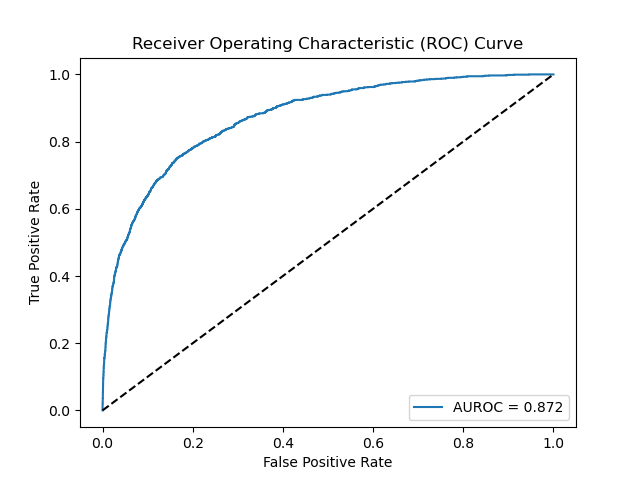

In [938]:
   
# # Plot the ROC curve
# plt.figure()
# plt.plot(fpr, tpr, label='AUROC = %0.3f' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

# Electronic models

In [488]:
# data_train_clean.head()

hospital_id  hospital_death   age  elective_surgery hospital_admit_source  \
0         120               0  68.0                 0                    12   
1          96               0  77.0                 0                    12   
5          98               0  67.0                 0                    10   
6          98               0  59.0                 0                    16   
7          38               0  70.0                 0                    11   

  icu_admit_source icu_id icu_type  apache_2_diagnosis  apache_post_operative  \
0                2    208        3               113.0                      0   
1                2    195        6               108.0                      0   
5                1    216        6               301.0                      0   
6                1    216        6               108.0                      0   
7                1    204        6               113.0                      0   

   arf_apache  bun_apache  creatinine_apache  gcs_unable_apache  \
0         0.0        31.0               2.51                0.0   
1         0.0         9.0               0.56                0.0   
5         0.0        13.0               0.71                0.0   
6         0.0        18.0               0.78                0.0   
7         0.0        48.0               2.05                0.0   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0               27.4               0.0   
1           145.0              120.0               36.9               0.0   
5           156.0              113.0               44.2               0.0   
6           197.0              133.0               33.5               1.0   
7           164.0              120.0               22.6               0.0   

   map_apache  resprate_apache  sodium_apache  temp_apache  ventilated_apache  \
0        40.0             36.0          134.0         39.3                0.0   
1        46.0             33.0          145.0         35.1                1.0   
5       130.0             35.0          137.0         36.6                0.0   
6       138.0             53.0          135.0         35.0                1.0   
7        60.0             28.0          140.0         36.6                1.0   

   wbc_apache  d1_diasbp_invasive_max  d1_diasbp_invasive_min  d1_diasbp_max  \
0        14.1                    46.0                    32.0           68.0   
1        12.7                    95.0                    31.0           95.0   
5        10.9                   100.0                    61.0          100.0   
6         5.9                   107.0                    65.0           76.0   
7        12.8                    84.0                    46.0           84.0   

   d1_diasbp_min  d1_heartrate_max  d1_heartrate_min  d1_mbp_invasive_max  \
0           37.0             119.0              72.0                 66.0   
1           31.0             118.0              72.0                120.0   
5           61.0             113.0              83.0                127.0   
6           68.0             112.0              70.0                138.0   
7           46.0             118.0              86.0                114.0   

   d1_mbp_invasive_min  d1_mbp_max  d1_mbp_min  d1_resprate_max  \
0                 40.0        89.0        46.0             34.0   
1                 38.0       120.0        38.0             32.0   
5                 80.0       127.0        80.0             32.0   
6                 84.0       117.0        97.0             38.0   
7                 60.0       114.0        60.0             28.0   

   d1_resprate_min  d1_spo2_max  d1_spo2_min  d1_sysbp_invasive_max  \
0             10.0        100.0         74.0                  122.0   
1             12.0        100.0         70.0                  159.0   
5             10.0         97.0         91.0                  173.0   
6             16.0        100.0         87.0            

In [493]:
# electro_data_train=data_train_clean.drop([
# 'bun_apache','creatinine_apache','hematocrit_apache','sodium_apache',
# 'wbc_apache',                                           
# 'apache_4a_icu_death_prob'], axis=1)

In [494]:
# electro_data_train.head()

hospital_id  hospital_death   age  elective_surgery hospital_admit_source  \
0         120               0  68.0                 0                    12   
1          96               0  77.0                 0                    12   
5          98               0  67.0                 0                    10   
6          98               0  59.0                 0                    16   
7          38               0  70.0                 0                    11   

  icu_admit_source icu_id icu_type  apache_2_diagnosis  apache_post_operative  \
0                2    208        3               113.0                      0   
1                2    195        6               108.0                      0   
5                1    216        6               301.0                      0   
6                1    216        6               108.0                      0   
7                1    204        6               113.0                      0   

   arf_apache  gcs_unable_apache  glucose_apache  heart_rate_apache  \
0         0.0                0.0           168.0              118.0   
1         0.0                0.0           145.0              120.0   
5         0.0                0.0           156.0              113.0   
6         0.0                0.0           197.0              133.0   
7         0.0                0.0           164.0              120.0   

   intubated_apache  map_apache  resprate_apache  temp_apache  \
0               0.0        40.0             36.0         39.3   
1               0.0        46.0             33.0         35.1   
5               0.0       130.0             35.0         36.6   
6               1.0       138.0             53.0         35.0   
7               0.0        60.0             28.0         36.6   

   ventilated_apache  d1_diasbp_invasive_max  d1_diasbp_invasive_min  \
0                0.0                    46.0                    32.0   
1                1.0                    95.0                    31.0   
5                0.0                   100.0                    61.0   
6                1.0                   107.0                    65.0   
7                1.0                    84.0                    46.0   

   d1_diasbp_max  d1_diasbp_min  d1_heartrate_max  d1_heartrate_min  \
0           68.0           37.0             119.0              72.0   
1           95.0           31.0             118.0              72.0   
5          100.0           61.0             113.0              83.0   
6           76.0           68.0             112.0              70.0   
7           84.0           46.0             118.0              86.0   

   d1_mbp_invasive_max  d1_mbp_invasive_min  d1_mbp_max  d1_mbp_min  \
0                 66.0                 40.0        89.0        46.0   
1                120.0                 38.0       120.0        38.0   
5                127.0                 80.0       127.0        80.0   
6                138.0                 84.0       117.0        97.0   
7                114.0                 60.0       114.0        60.0   

   d1_resprate_max  d1_resprate_min  d1_spo2_max  d1_spo2_min  \
0             34.0             10.0        100.0         74.0   
1             32.0             12.0        100.0         70.0   
5             32.0             10.0         97.0         91.0   
6             38.0             16.0        100.0         87.0   
7             28.0             12.0        100.0         92.0   

   d1_sysbp_invasive_max  d1_sysbp_invasive_min  d1_sysbp_max  d1_sysbp_min  \
0                  122.0                   64.0         131.0          73.0   
1                  159.0                   67.0         159.0          67.0   
5                  173.0                  107.0         173.0         107.0   
6                  191.0                  116.0         151.0         133.0   
7                  147.0                   71.0         147.0          71.0   

   d1_temp_max  d1_temp_min  h1_diasbp_invasive_max  h1_diasbp_invasi

# Electro BLR

In [495]:
# el_X_train, el_X_eval, = train_test_split(electro_data_train, test_size = 0.35, train_size=0.65)

In [496]:
# el_X_train_final = el_X_train.pop('hospital_death') 
# el_X_eval_final = el_X_eval.pop('hospital_death')

In [498]:
# el_CATEGORICAL_COLUMNS = ["hospital_id", "hospital_admit_source",
#                         "icu_admit_source","icu_id","icu_type",
#                          "apache_3j_bodysystem"]
# el_NUMERIC_COLUMNS = [
# 'h1_mbp_max','h1_mbp_invasive_max','h1_heartrate_min','h1_heartrate_max','h1_diasbp_min','h1_diasbp_max',
    
# 'h1_mbp_min','h1_diasbp_invasive_min','d1_temp_min','d1_temp_max','d1_sysbp_min','d1_sysbp_max',
    
# 'd1_sysbp_invasive_min','d1_sysbp_invasive_max','h1_diasbp_invasive_max','d1_spo2_min','h1_mbp_noninvasive_min',
    
# 'h1_resprate_min','leukemia','lymphoma','cirrhosis','diabetes_mellitus','hepatic_failure','immunosuppression',
    
# 'h1_resprate_max','aids','h1_sysbp_max','h1_sysbp_min','h1_sysbp_invasive_max','h1_sysbp_invasive_min',
    
# 'solid_tumor_with_metastasis','h1_spo2_max','h1_spo2_min','d1_spo2_max',
    
# 'd1_resprate_max','d1_resprate_min','glucose_apache','gcs_unable_apache','arf_apache',
    
# 'apache_post_operative','heart_rate_apache','apache_2_diagnosis',
    
# 'elective_surgery','age','intubated_apache','map_apache','d1_mbp_min',
    
# 'd1_mbp_max','d1_mbp_invasive_min','d1_mbp_invasive_max','d1_heartrate_min','d1_heartrate_max','d1_diasbp_min','d1_diasbp_max',
    
# 'd1_diasbp_invasive_min','d1_diasbp_invasive_max','ventilated_apache','temp_apache',
    
# 'resprate_apache'
# ]

# el_feature_columns = []
# for feature_name in el_CATEGORICAL_COLUMNS:
#     vocabulary = el_X_train[feature_name].unique()
#     el_feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

# for feature_name in el_NUMERIC_COLUMNS:
#     el_feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))


In [499]:
# el_train_input_fn = make_input_fn(el_X_train, el_X_train_final)
# el_eval_input_fn = make_input_fn(el_X_eval, el_X_eval_final, num_epochs=1, shuffle=False)

In [964]:
# el_linear_est = tf.estimator.LinearClassifier(feature_columns=el_feature_columns)
# el_linear_est.train(el_train_input_fn)

# result = el_linear_est.evaluate(el_eval_input_fn)
# clear_output()
# # Print accuracy
# print("Accuracy: {:.4f}".format(result['accuracy']))

Accuracy: 0.9131


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\brian\AppData\Local\Temp\tmppy4f1ysy\model.ckpt-9930
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<IPython.core.display.Javascript object>


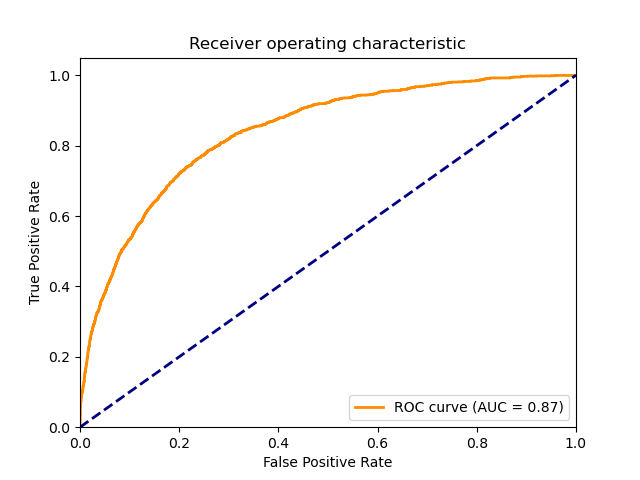

In [501]:
# y_pred_el_BLR = list(el_linear_est.predict(el_eval_input_fn))
# y_pred_prob_el_BLR = [pred['probabilities'][1] for pred in y_pred_el_BLR]
# y_true_el_BLR = el_X_eval_final.values

# # Compute the ROC curve and area under the curve (AUC)
# el_fpr, el_tpr, thresholds = roc_curve(y_true_el_BLR, y_pred_prob_el_BLR)
# el_roc_auc = auc(fpr, tpr)

# # Plot the ROC curve
# plt.figure()
# lw = 2
# plt.plot(el_fpr, el_tpr, color='darkorange', lw=lw, label='ROC curve (AUC = %0.2f)' % el_roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.show()

In [502]:
# el_X_ANN = electro_data_train.drop('hospital_death', axis=1)
# el_y_ANN = electro_data_train['hospital_death']
# el_X_train_ANN, el_X_test_ANN, el_y_train_ANN, el_y_test_ANN = train_test_split(el_X_ANN, el_y_ANN, test_size=0.2, random_state=42)

In [503]:
# el_X_train_ANN = scaler.fit_transform(el_X_train_ANN)
# el_X_test_ANN = scaler.transform(el_X_test_ANN)

In [507]:
# el_model = keras.Sequential([
#     keras.layers.Dense(16, activation='relu', input_shape=(65,)),
#     keras.layers.Dense(16, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

In [508]:
# el_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [509]:
# el_history = el_model.fit(el_X_train_ANN, el_y_train_ANN, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
978/978 [==============================] - 1s 1ms/step - loss: 0.2697 - accuracy: 0.9072 - val_loss: 0.2575 - val_accuracy: 0.9101
Epoch 2/50
978/978 [==============================] - 1s 1ms/step - loss: 0.2318 - accuracy: 0.9164 - val_loss: 0.2519 - val_accuracy: 0.9104
Epoch 3/50
978/978 [==============================] - 1s 1ms/step - loss: 0.2262 - accuracy: 0.9182 - val_loss: 0.2494 - val_accuracy: 0.9102
Epoch 4/50
978/978 [==============================] - 1s 980us/step - loss: 0.2228 - accuracy: 0.9192 - val_loss: 0.2470 - val_accuracy: 0.9115
Epoch 5/50
978/978 [==============================] - 1s 880us/step - loss: 0.2204 - accuracy: 0.9199 - val_loss: 0.2467 - val_accuracy: 0.9111
Epoch 6/50
978/978 [==============================] - 1s 892us/step - loss: 0.2186 - accuracy: 0.9204 - val_loss: 0.2463 - val_accuracy: 0.9110
Epoch 7/50
978/978 [==============================] - 1s 993us/step - loss: 0.2169 - accuracy: 0.9207 - val_loss: 0.2457 - val_accuracy: 0.910

In [510]:
# el_test_loss, el_test_acc = el_model.evaluate(el_X_test_ANN, el_y_test_ANN)
# print('Test accuracy:', el_test_acc)

306/306 [==============================] - 0s 657us/step - loss: 0.2188 - accuracy: 0.9215
Test accuracy: 0.9215425252914429


In [511]:
# # Predict probabilities for the test set
# el_y_pred_prob_ANN = el_model.predict(el_X_test_ANN)
    
# # Compute the false positive rate, true positive rate, and thresholds
# el_fpr, el_tpr, el_thresholds = roc_curve(el_y_test_ANN, el_y_pred_prob_ANN)
    
# # Compute the AUROC score
# el_roc_auc = roc_auc_score(el_y_test_ANN, el_y_pred_prob_ANN)

306/306 [==============================] - 0s 576us/step


<IPython.core.display.Javascript object>


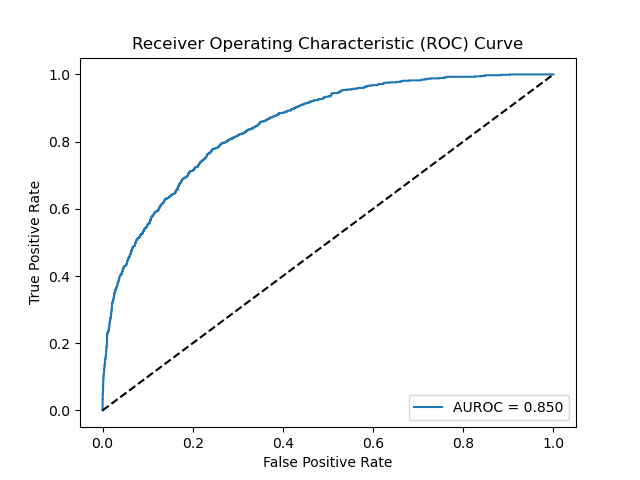

In [512]:
   
# # Plot the ROC curve
# plt.figure()
# plt.plot(el_fpr, el_tpr, label='AUROC = %0.3f' % el_roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()